Loading in the needed libraries. 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bar_chart_race as bcr
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib
from IPython.display import HTML
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import warnings
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')
sns.set_theme()

# Motivation

In this project the focus will be to analyze data regarding climate change and discover hidden information about what countries cares the most about the climate and who emits the most greenhouse gasses into the athmosphere. 


Multiple datasets has been collected to undergo this analysis. All data has been publicaly available from multiple sources but with the majority from *The World Bank*. First and foremost, there has been collected some data of a global temperature index. This is an index that measures the average global temperature annually with respect to a benchmark that was set in 1880. 

Moreover, data of each country's emission of greenhouse gases from 1970 which is measured in Kt (kilo tons, i.e. 1,000,000 kg) of CO2 equivalent emission. 

Next, datasets of each country's GDP and population is collected, likewise from 1970, which will be used to *normalize* emissions from each country. GNP and population are good measures to normalize the gas emissions and also potential reasons why some countries emit more greenhouse gases than others. 

There has also been collected some data of each country's exposure to rising sea levels in form of a fraction of population and land area that is below 5 meters above the sea level. This is collected in order to analyze whether the more *exposed* countries are more willing to reduce their carbon footprint. 

Lastly, a survey from 2021 is found containing public opinions of climate change from each country. This survey includes public opinions on whether climate change is real, whether the government prioritizes it enough, if it's caused by human actions or occured naturally and multiple other questions. 


When starting this project, the hope was to undercover some useful information that is contrary with the usual belief such as that westeren countries are more active in fighting climate change. 

## Loading the Data Sets

Loading in the global temperature index data set. 

In [48]:
temp_index = pd.read_csv('data/global_temp.csv')
temp_index.head(3)

Year  Value
0  1880  -0.09
1  1881   0.05
2  1882   0.00

Loading in the greenhouse gas emission data set. This data set contains the equivalent CO2 emission in Kt from each country in the period between 1960 and 2020. 

In [49]:
gh_emission = pd.read_csv('data/total_emission_kt_co2eq.csv')
gh_emission.set_index('Country Code', inplace=True, drop=True)
gh_emission.head(2)

Country Name  \
Country Code                                
ABW                                 Aruba   
AFE           Africa Eastern and Southern   

                                                 Indicator Name  \
Country Code                                                      
ABW           Total greenhouse gas emissions (kt of CO2 equi...   
AFE           Total greenhouse gas emissions (kt of CO2 equi...   

                 Indicator Code  1960  1961  1962  1963  1964  1965  1966  \
Country Code                                                                
ABW           EN.ATM.GHGT.KT.CE   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
AFE           EN.ATM.GHGT.KT.CE   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

              ...       2012       2013       2014       2015       2016  \
Country Code  ...                                                          
ABW           ...        NaN        NaN        NaN        NaN        NaN   
AFE           ...  1381860.0  1406900.0  1436410.0  1436770.0  1457530.0   

                   2017       2018  2019  2020  Unnamed: 65  
Country Code                                                 
ABW                 NaN        NaN   NaN   NaN          NaN  
AFE           1471620.0  1478910.0   NaN   NaN          NaN  

[2 rows x 65 columns]

Loading in the population data set. This data set contains the population of each country from 1960 to 2020. 

In [50]:
population = pd.read_csv('data/population_world.csv', sep=',')
population.set_index('Country Code', inplace=True, drop=True)
population.head(2)

Country Name     Indicator Name Indicator Code  \
Country Code                                                                  
ABW                                 Aruba  Population, total    SP.POP.TOTL   
AFE           Africa Eastern and Southern  Population, total    SP.POP.TOTL   

                     1960         1961         1962         1963         1964  \
Country Code                                                                    
ABW               54208.0      55434.0      56234.0      56699.0      57029.0   
AFE           130836765.0  134159786.0  137614644.0  141202036.0  144920186.0   

                     1965         1966  ...         2012         2013  \
Country Code                            ...                             
ABW               57357.0      57702.0  ...     102565.0     103165.0   
AFE           148769974.0  152752671.0  ...  547482863.0  562601578.0   

                     2014         2015         2016         2017         2018  \
Country Code                                                                    
ABW              103776.0     104339.0     104865.0     105361.0     105846.0   
AFE           578075373.0  593871847.0  609978946.0  626392880.0  643090131.0   

                     2019         2020  Unnamed: 65  
Country Code                                         
ABW              106310.0     106766.0          NaN  
AFE           660046272.0  677243299.0          NaN  

[2 rows x 65 columns]

Loading in the GDP data set. This data set contains the GDP of each country from 1960 to 2020. 

In [51]:
gnp = pd.read_csv('data/gnp_country.csv')
gnp.set_index('Country Code', inplace=True, drop=True)
gnp.head(2)

Country Name     Indicator Name  Indicator Code  \
Country Code                                                                   
ABW                                 Aruba  GNI (current US$)  NY.GNP.MKTP.CD   
AFE           Africa Eastern and Southern  GNI (current US$)  NY.GNP.MKTP.CD   

              1960  1961  1962  1963  1964  1965  1966  ...          2012  \
Country Code                                            ...                 
ABW            NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  2.418547e+09   
AFE            NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  9.159905e+11   

                      2013          2014          2015          2016  \
Country Code                                                           
ABW           2.563269e+09  2.688000e+09  2.838156e+09  2.848441e+09   
AFE           9.275131e+11  9.503103e+11  8.913149e+11  8.537421e+11   

                      2017          2018          2019          2020  \
Country Code                                                           
ABW           2.921760e+09  2.991585e+09           NaN           NaN   
AFE           9.586492e+11  9.856960e+11  9.854681e+11  9.016064e+11   

              Unnamed: 65  
Country Code               
ABW                   NaN  
AFE                   NaN  

[2 rows x 65 columns]

Loading in the landarea data set. This data set contains the fraction of the total land area of each country whose elevation is below 5 meters above the sea level. I.e the fraction of the total land area that is exposed if the sea level rises due to an increase of the sea temperature. 

In [52]:
landarea_u5m = pd.read_csv('data/landarea_frac_under5m.csv')
landarea_u5m.set_index('Country Code', inplace=True, drop=True)
landarea_u5m.head(2)

Country Name  \
Country Code                                
ABW                                 Aruba   
AFE           Africa Eastern and Southern   

                                                 Indicator Name  \
Country Code                                                      
ABW           Land area where elevation is below 5 meters (%...   
AFE           Land area where elevation is below 5 meters (%...   

              Indicator Code  1960  1961  1962  1963  1964  1965  1966  ...  \
Country Code                                                            ...   
ABW           AG.LND.EL5M.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
AFE           AG.LND.EL5M.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

              2012  2013  2014  2015  2016  2017  2018  2019  2020  \
Country Code                                                         
ABW            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
AFE            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

              Unnamed: 65  
Country Code               
ABW                   NaN  
AFE                   NaN  

[2 rows x 65 columns]

Loading in the exposed population data set. This data set contains the fraction of the total population of each country who live in areas whose elevation is below 5 meters above the sea level. I.e the fraction of the total population that is exposed if the sea level rises due to an increase of the sea temperature. 

In [53]:
population_u5m = pd.read_csv('data/pop_frac_under5m.csv')
population_u5m.set_index('Country Code', inplace=True, drop=True)
population_u5m.head(2)

Country Name  \
Country Code                                
ABW                                 Aruba   
AFE           Africa Eastern and Southern   

                                                 Indicator Name  \
Country Code                                                      
ABW           Population living in areas where elevation is ...   
AFE           Population living in areas where elevation is ...   

              Indicator Code  1960  1961  1962  1963  1964  1965  1966  ...  \
Country Code                                                            ...   
ABW           EN.POP.EL5M.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
AFE           EN.POP.EL5M.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

              2012  2013  2014  2015  2016  2017  2018  2019  2020  \
Country Code                                                         
ABW            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
AFE            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

              Unnamed: 65  
Country Code               
ABW                   NaN  
AFE                   NaN  

[2 rows x 65 columns]

Loading in the fossil fuel data set. This data sets contains the fraction of the total energy consumption in percentage for each country that comes from fossil fuels. The data is recorded from 1960 to 2020 but is rather sparse since most countries haven't published their fossil fuel energy consumption. 

In [54]:
fossil_energy = pd.read_csv('data/fossil_fuel_energy_frac.csv')
fossil_energy.set_index('Country Code', inplace=True, drop=True)
fossil_energy.head(2)

Country Name  \
Country Code                                
ABW                                 Aruba   
AFE           Africa Eastern and Southern   

                                           Indicator Name     Indicator Code  \
Country Code                                                                   
ABW           Fossil fuel energy consumption (% of total)  EG.USE.COMM.FO.ZS   
AFE           Fossil fuel energy consumption (% of total)  EG.USE.COMM.FO.ZS   

              1960  1961  1962  1963  1964  1965  1966  ...       2012  \
Country Code                                            ...              
ABW            NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
AFE            NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  47.572413   

                  2013       2014  2015  2016  2017  2018  2019  2020  \
Country Code                                                            
ABW                NaN        NaN   NaN   NaN   NaN   NaN   NaN   NaN   
AFE           46.89518  49.304292   NaN   NaN   NaN   NaN   NaN   NaN   

              Unnamed: 65  
Country Code               
ABW                   NaN  
AFE                   NaN  

[2 rows x 65 columns]

Loading the renewable energy dataset. This data set contains the fraction of the total energy consumption for each country that comes from renewable energy sources. 

In [55]:
renew_energy = pd.read_csv('data/renew_energy_frac.csv')
renew_energy.set_index('Country Code', inplace=True, drop=True)
renew_energy.head(2)

Country Name  \
Country Code                                
ABW                                 Aruba   
AFE           Africa Eastern and Southern   

                                                 Indicator Name  \
Country Code                                                      
ABW           Renewable energy consumption (% of total final...   
AFE           Renewable energy consumption (% of total final...   

              Indicator Code  1960  1961  1962  1963  1964  1965  1966  ...  \
Country Code                                                            ...   
ABW           EG.FEC.RNEW.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
AFE           EG.FEC.RNEW.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

                   2012       2013       2014       2015    2016    2017  \
Country Code                                                               
ABW            6.855900   6.889700   6.927500   6.728000  6.9946  6.6993   
AFE           61.109554  60.468838  60.803934  61.097264     NaN     NaN   

                2018  2019  2020  Unnamed: 65  
Country Code                                   
ABW           8.0241   NaN   NaN          NaN  
AFE              NaN   NaN   NaN          NaN  

[2 rows x 65 columns]

Loading the country ISO codes. This is used to identify the countries across the data sets in case different ways of spellings are used. ISO codes are universal for each country and thus a good identifier. 

In [56]:
country_iso_codes = pd.read_csv('data/iso_3digit_alpha_country_codes.csv', sep=';')
country_iso_codes
country_iso = country_iso_codes[['Code Value', 'Definition']]
country_iso.rename(columns={'Code Value': 'iso', 'Definition': 'country'}, inplace=True)
country_iso.set_index('iso', inplace=True, drop=True)
country_iso.head()

country
iso                
AFG     Afghanistan
ALA   Aland Islands
ALB         Albania
DZA         Algeria
ASM  American Samoa

Loading the continent data set. This data set is a mapping between country and the continent that the country belongs to. This is solely used to aggregate the data to continents to gain more knowledge about all the data sets. 

In [57]:
country2continent = pd.read_csv('data/country2continent.csv')
country2continent.set_index('alpha-3', inplace=True, drop=True)
country2continent.head(3)

name alpha-2  country-code     iso_3166-2  region  \
alpha-3                                                               
AFG        Afghanistan      AF             4  ISO 3166-2:AF    Asia   
ALA      Åland Islands      AX           248  ISO 3166-2:AX  Europe   
ALB            Albania      AL             8  ISO 3166-2:AL  Europe   

              sub-region intermediate-region  region-code  sub-region-code  \
alpha-3                                                                      
AFG        Southern Asia                 NaN        142.0             34.0   
ALA      Northern Europe                 NaN        150.0            154.0   
ALB      Southern Europe                 NaN        150.0             39.0   

         intermediate-region-code  
alpha-3                            
AFG                           NaN  
ALA                           NaN  
ALB                           NaN

Loading in the awareness data set from the climate change survey. This data set contains answers from participants from 30 different countries about their own awareness of climate changes. The participants are given the question *Have you heard about the climate changes?* on which the participants could answer *Never heard of it*, *I know a little, I know moderately, I know a lot, refuse to answer*. 

In [58]:
awareness = pd.read_excel('data/climate_change_survery.xlsx', sheet_name='climate_awareness')
awareness

climate_awareness  Argentina  Australia  Brazil  Canada  \
0           I have never heard of it         11          2       4       2   
1           I know a little about it         38         20      34      24   
2  I know a moderate amount about it         42         52      51      50   
3              I know a lot about it          8         25      10      24   
4                            Refused          1          1       1       0   
5                  (Unweighted Base)       2450       2668    2093    2888   

   Colombia  Costa Rica  Czech Republic  Egypt  France  ...  Russia  \
0        13          10               3     19       3  ...       3   
1        41          37              50     39      24  ...      59   
2        37          41              40     30      47  ...      30   
3         7          10               6     10      25  ...       6   
4         2           2               0      2       0  ...       1   
5      2040        2464            2431   1394    2339  ...    2568   

   Saudi Arabia  South Africa  Spain  Taiwan  Thailand  Turkey  \
0            18            15      4       4        14       7   
1            36            42     35      58        43      25   
2            27            25     51      30        38      51   
3            15            13      9       6         4      16   
4             4             5      1       1         1       1   
5           952          1512   2319    1918      1442    1712   

   United Kingdom  United States  Vietnam  
0               2              3       16  
1              23             26       40  
2              57             48       24  
3              18             23       16  
4               0              1        5  
5            2587          13555     1263  

[6 rows x 32 columns]

Loading in the climate change happening data set from the climate change survey. This data sets contains answers from participants from 30 different countries aboutwhether they believe that the climate is changing or not. They are asked the question *Do you believe that the climate is changing?* and the participants could answer *Yes, no, don't know* or *refuse to answer*. 

In [59]:
happening = pd.read_excel('data/climate_change_survery.xlsx', sheet_name='climate_happening')
happening

climate_happening  Argentina  Australia  Brazil  Canada  Colombia  \
0                Yes         90         84      92      89        90   
1                 No          2         10       3       5         2   
2         Don't know          7          7       4       6         7   
3            Refused          0          0       0       0         0   
4  (Unweighted Base)       2450       2668    2093    2888      2040   

   Costa Rica  Czech Republic  Egypt  France  ...  Russia  Saudi Arabia  \
0          94              87     79      91  ...      85            79   
1           2               5      5       3  ...       7             5   
2           4               7     15       5  ...       8            16   
3           0               0      0       0  ...       0             0   
4        2464            2431   1394    2339  ...    2568           952   

   South Africa  Spain  Taiwan  Thailand  Turkey  United Kingdom  \
0            84     92      91        85      89              90   
1             2      3       2         2       3               4   
2            11      5       6        13       8               6   
3             2      0       1         1       0               0   
4          1512   2319    1918      1442    1712            2587   

   United States  Vietnam  
0             80       89  
1             12        3  
2              7        7  
3              0        0  
4          13555     1263  

[5 rows x 32 columns]

Loading in the priority data set from the climate change survey. This data sets contains answers from participants from 30 different countries about how their government should prioritize fighting climate change. They are asked the question *How should you government prioritize climate changes?* and the participants could answer *Very high, High, medium, low* or *refuse to answer*. 

In [60]:
gov_priority = pd.read_excel('data/climate_change_survery.xlsx', sheet_name='gov_priority')
gov_priority

gov_priority  Argentina  Australia  Brazil  Canada  Colombia  \
0          Very high         48         47      54      42        66   
1               High         34         24      28      31        24   
2             Medium         13         15      12      15         6   
3                Low          4         14       5      13         3   
4            Refused          1          0       1       0         2   
5  (Unweighted Base)       2450       2668    2093    2888      2040   

   Costa Rica  Czech Republic  Egypt  France  ...  Russia  Saudi Arabia  \
0          61              21     28      48  ...      28            27   
1          28              39     26      33  ...      36            26   
2           7              29     30      14  ...      24            35   
3           3              11     12       5  ...      11            11   
4           1               0      3       0  ...       1             2   
5        2464            2431   1394    2339  ...    2568           952   

   South Africa  Spain  Taiwan  Thailand  Turkey  United Kingdom  \
0            42     52      26        26      27              44   
1            28     34      42        37      29              32   
2            18     10      21        27      24              17   
3            10      3      10         9      20               7   
4             2      0       1         1       1               0   
5          1512   2319    1918      1442    1712            2587   

   United States  Vietnam  
0             37       43  
1             24       38  
2             16       17  
3             22        2  
4              0        1  
5          13555     1263  

[6 rows x 32 columns]

## Basic Stats

### Data Processing

Most of the data sets are clean and ready to be used. Thus, not a lot of processing is needed to use the data. One small adjustment is filtering out regions that are not official countries or which not all data sets contains data from. Except for the survery data set which only includes 30 countries, the rest of the data sets has between 179 and 245 different regions/countries in their data sets. In order to be able to compare across the different data sets, only the countries that are represented in all data sets will be used. 

In [61]:
iso_codes = set(country_iso.index).intersection(
    set(population.index),
    set(gh_emission.index),
    set(gnp.index),
    set(landarea_u5m.index),
    set(population_u5m.index),
    set(fossil_energy.index),
    set(renew_energy.index),
    set(country2continent.index)
)
country_iso_filtered = country_iso.loc[iso_codes, :]
iso_codes = country_iso_filtered.index
country_iso_filtered

country
iso                          
AZE                Azerbaijan
NIC                 Nicaragua
CPV                Cape Verde
TGO                      Togo
MRT                Mauritania
..                        ...
TCA  Turks and Caicos Islands
PLW                     Palau
MDG                Madagascar
TUN                   Tunisia
DJI                  Djibouti

[215 rows x 1 columns]

Moreover, since Plotly will be used to plot aggregated data, it is neccesary to make each data point for each country, each year as a row in a large data frame. Thus, a new dataframe called **data** will be made which stores all information such as GDP, population, gas emission etc for each year for each country as a row. 

In [62]:
data = pd.DataFrame(columns=[
    'iso',
    'country', 
    'region', 
    'sub_region', 
    'year', 
    'gnp',
    'gnp_growth',
    'gnp_per_cap',
    'population',
    'population_growth',
    'population_frac_u5m', 
    'landarea_frac_u5m', 
    'gh_emission',
    'gh_emission_growth',
    'gh_emission_per_cap', 
    'renew_frac', 
    'fossil_frac'
])

for country_code in country_iso_filtered.index:
    country = country_iso_filtered.loc[country_code, 'country']
    for year in np.arange(1960, 2021):
        prev_year = str(year - 1)
        year = str(year)
        row = pd.Series({
            'iso': country_code,
            'country': country,
            'region': country2continent.loc[country_code, 'region'],
            'sub_region': country2continent.loc[country_code, 'sub-region'],
            'year': int(year), 
            'gnp': gnp.loc[country_code, year],
            'gnp_growth': (gnp.loc[country_code, year] / gnp.loc[country_code, prev_year] - 1) if int(prev_year)>= 1960 else np.nan, 
            'gnp_per_cap': gnp.loc[country_code, year] / population.loc[country_code, year], 
            'population': population.loc[country_code, year],
            'population_growth': population.loc[country_code, year] / population.loc[country_code, prev_year] - 1 if int(prev_year) >= 1960 else np.nan,
            'population_frac_u5m': population_u5m.loc[country_code, year],
            'landarea_frac_u5m': landarea_u5m.loc[country_code, year],
            'gh_emission': gh_emission.loc[country_code, year],
            'gh_emission_growth': gh_emission.loc[country_code, year] / gh_emission.loc[country_code, prev_year] - 1 if int(prev_year) >= 1960 else np.nan,
            'gh_emission_per_cap': gh_emission.loc[country_code, year] / population.loc[country_code, year],
            'renew_frac': renew_energy.loc[country_code, year],
            'fossil_frac': fossil_energy.loc[country_code, year]
        })
        data = data.append(row, ignore_index=True)
data.dropna(axis=1, how='all', inplace=True)
data.head()

iso     country region    sub_region  year  gnp  gnp_growth  gnp_per_cap  \
0  AZE  Azerbaijan   Asia  Western Asia  1960  NaN         NaN          NaN   
1  AZE  Azerbaijan   Asia  Western Asia  1961  NaN         NaN          NaN   
2  AZE  Azerbaijan   Asia  Western Asia  1962  NaN         NaN          NaN   
3  AZE  Azerbaijan   Asia  Western Asia  1963  NaN         NaN          NaN   
4  AZE  Azerbaijan   Asia  Western Asia  1964  NaN         NaN          NaN   

   population  population_growth  population_frac_u5m  landarea_frac_u5m  \
0   3895398.0                NaN                  NaN                NaN   
1   4030325.0           0.034638                  NaN                NaN   
2   4171428.0           0.035010                  NaN                NaN   
3   4315127.0           0.034448                  NaN                NaN   
4   4456691.0           0.032806                  NaN                NaN   

   gh_emission  gh_emission_growth  gh_emission_per_cap  renew_frac  \
0          NaN                 NaN                  NaN         NaN   
1          NaN                 NaN                  NaN         NaN   
2          NaN                 NaN                  NaN         NaN   
3          NaN                 NaN                  NaN         NaN   
4          NaN                 NaN                  NaN         NaN   

   fossil_frac  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

The following cell shows the temperature index since 1880. When the values are below 0, it indicates that the average global temperature was colder than in 1880 which is highlighted with the blue color. Likewise, if the value is above 0 then it indicates the the average global tempereature was hotter than in 1880. 

### Exploratory Data Analysis

In [63]:
pos_temp_index = temp_index.copy()
pos_temp_index.Value[pos_temp_index.Value < 0] = 0

neg_temp_index = temp_index.copy()
neg_temp_index.Value[neg_temp_index.Value > 0] = 0

fig = go.Figure(go.Scatter(x=neg_temp_index.Year, y=neg_temp_index.Value, mode='lines', fill='tozeroy', fillcolor='blue', name="Temp Index"))
fig.add_trace(go.Scatter(x=pos_temp_index.Year, y=pos_temp_index.Value, mode='lines', fill='tozeroy', fillcolor='red', name="Temp Index"))
fig.update_layout(showlegend=False)
fig.update_xaxes(tickfont_size=15)
fig.update_yaxes(tickfont_size=15)
fig.update_layout(xaxis_title="Year", yaxis_title="Temperature Index", title_text="Temperature Index Since 1880", title_font_size=20, title_x=0.5)
fig.write_html("images/temperatureindex.html")
fig.write_image("images/temperatureindex.png")
fig.write_json("images/temperatureindex.json")
fig.show()

The following functions takes in the survey results and plots a horizontal bar plot which shows the distribition of answers given by the participants from each country. 

In [64]:
def survey(results, category_names, title):
    
    labels = list(results.index)
    data = results.values
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 40))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        ax.tick_params(axis='both', which='major', labelsize=30)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(round(c*100)) + "%", ha='center', va='center',
                    color=text_color, fontsize=20)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=20)
    plt.suptitle(title, fontsize=40)
    #fig.tight_layout()
    fig.savefig("images/" + title.replace(" ", "_"))
    return fig, ax

First, we have the answers regarding knowledge about climate change. As the figure shows, the vast majority from all countries have heard about it to some extent. Countries like Nigeria and Malaysia and Egypt are the countries with the most participants that haven't heard of climate change with 28%, 20% and 19%, respectively. In the other spectrum we find Netherlands, Poland and Australia who haven't heard of climate change which accounted for 1%, 1% and 2% of all the answers, respectively. 

It also seems that if a country's citizens have heard about the climate change, the seem to have a moderate amount of knowledge about it. However in the countries with low education in climate change, you also find the most participants who knows a lot about climate change which seems quite counterintuitive. One possible explanation is that since the overall education about the subject is so low in these countries, those that do know may be [overconfident](https://hbr.org/2018/03/research-learning-a-little-about-something-makes-us-overconfident) of their knowledge. 

(<Figure size 1440x2880 with 1 Axes>, <AxesSubplot:>)

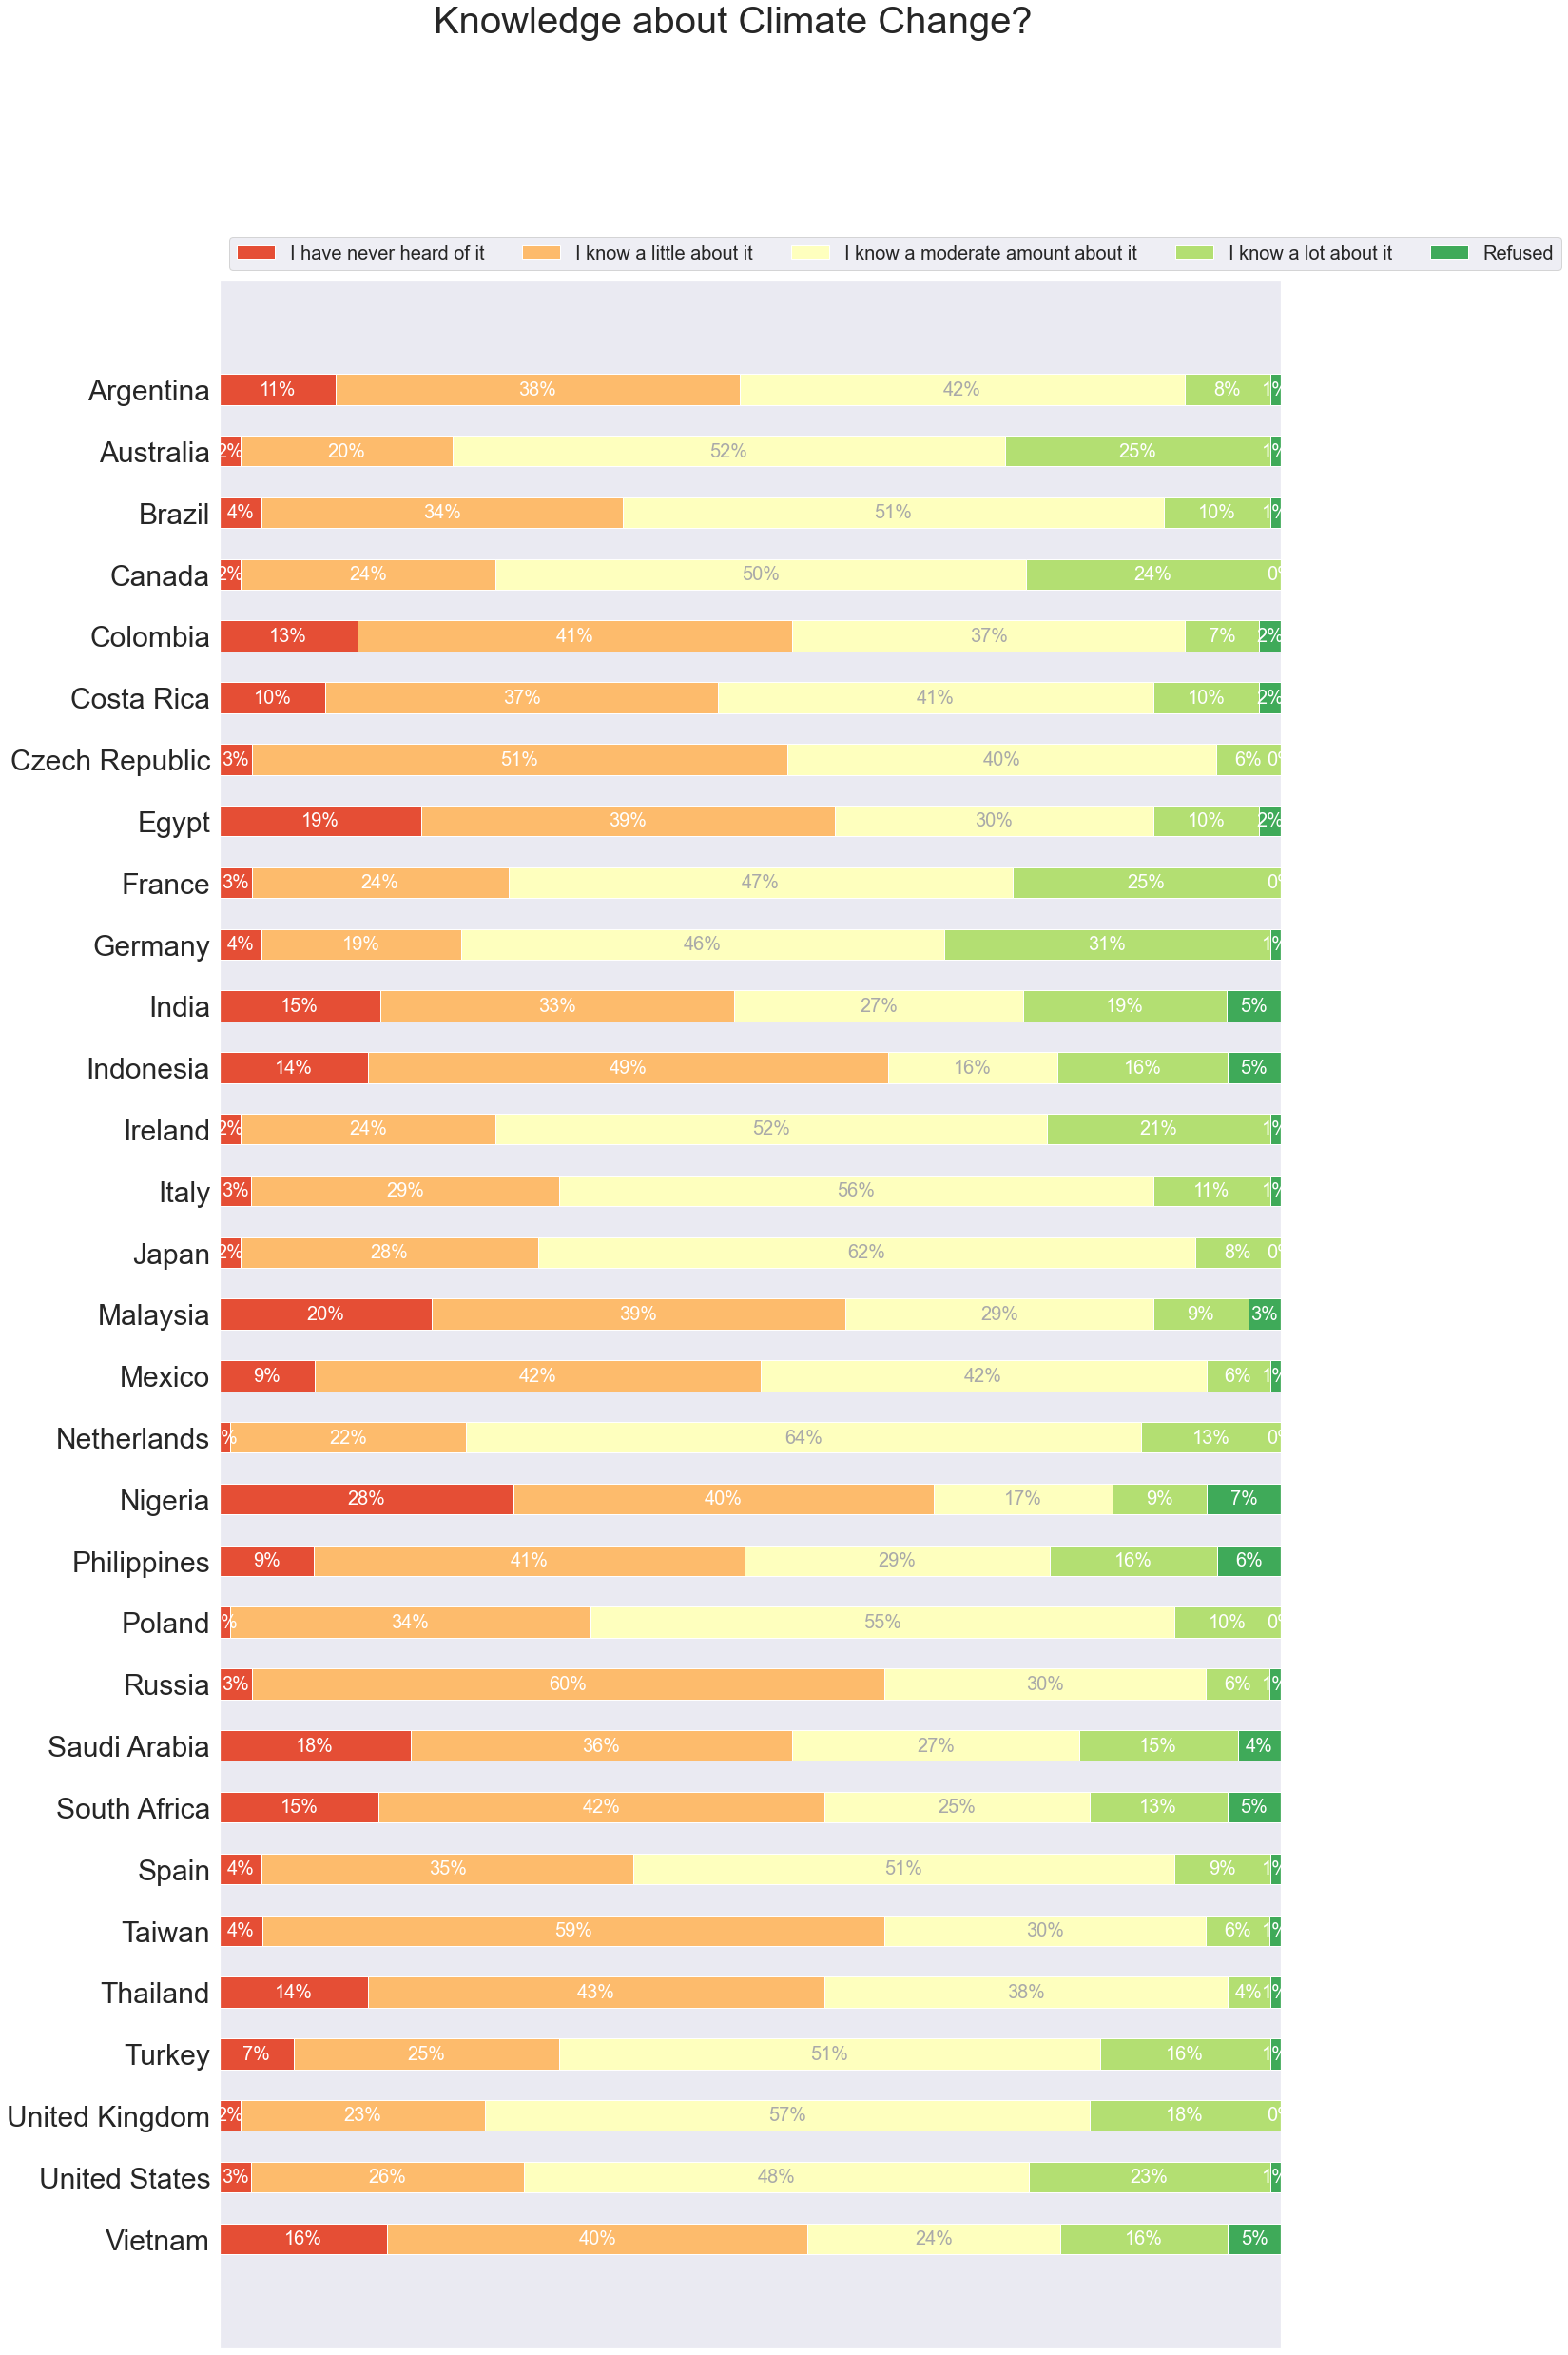

In [65]:
questions = awareness.iloc[:-1, 0]
awareness_data = awareness.iloc[:-1, 1:]
awareness_frac = awareness_data.transpose().apply(lambda row: row / sum(row), axis=1)
survey(awareness_frac, questions, "Knowledge about Climate Change?")

The next survey answers is about whether the participants believe that climate change is actually happening. As the figure shows, the vast majority across all countries belives that climate change is happening. One inconsisteny with the data is that e.g. Nigeria, 15% doesn't know whether climate change is happening whereas 28% never heard of climate change. Thus, one must be careful with relying too much on these data sets since they seem to contradict itself or there has been some biases in the data collection. For instance the way the questions were asked or whether the interviewer gave remarks after the participants answered which biased their following answers. Or simply the participants answered without thinking too much about the question and thus answered with their 'gut'. 

(<Figure size 1440x2880 with 1 Axes>, <AxesSubplot:>)

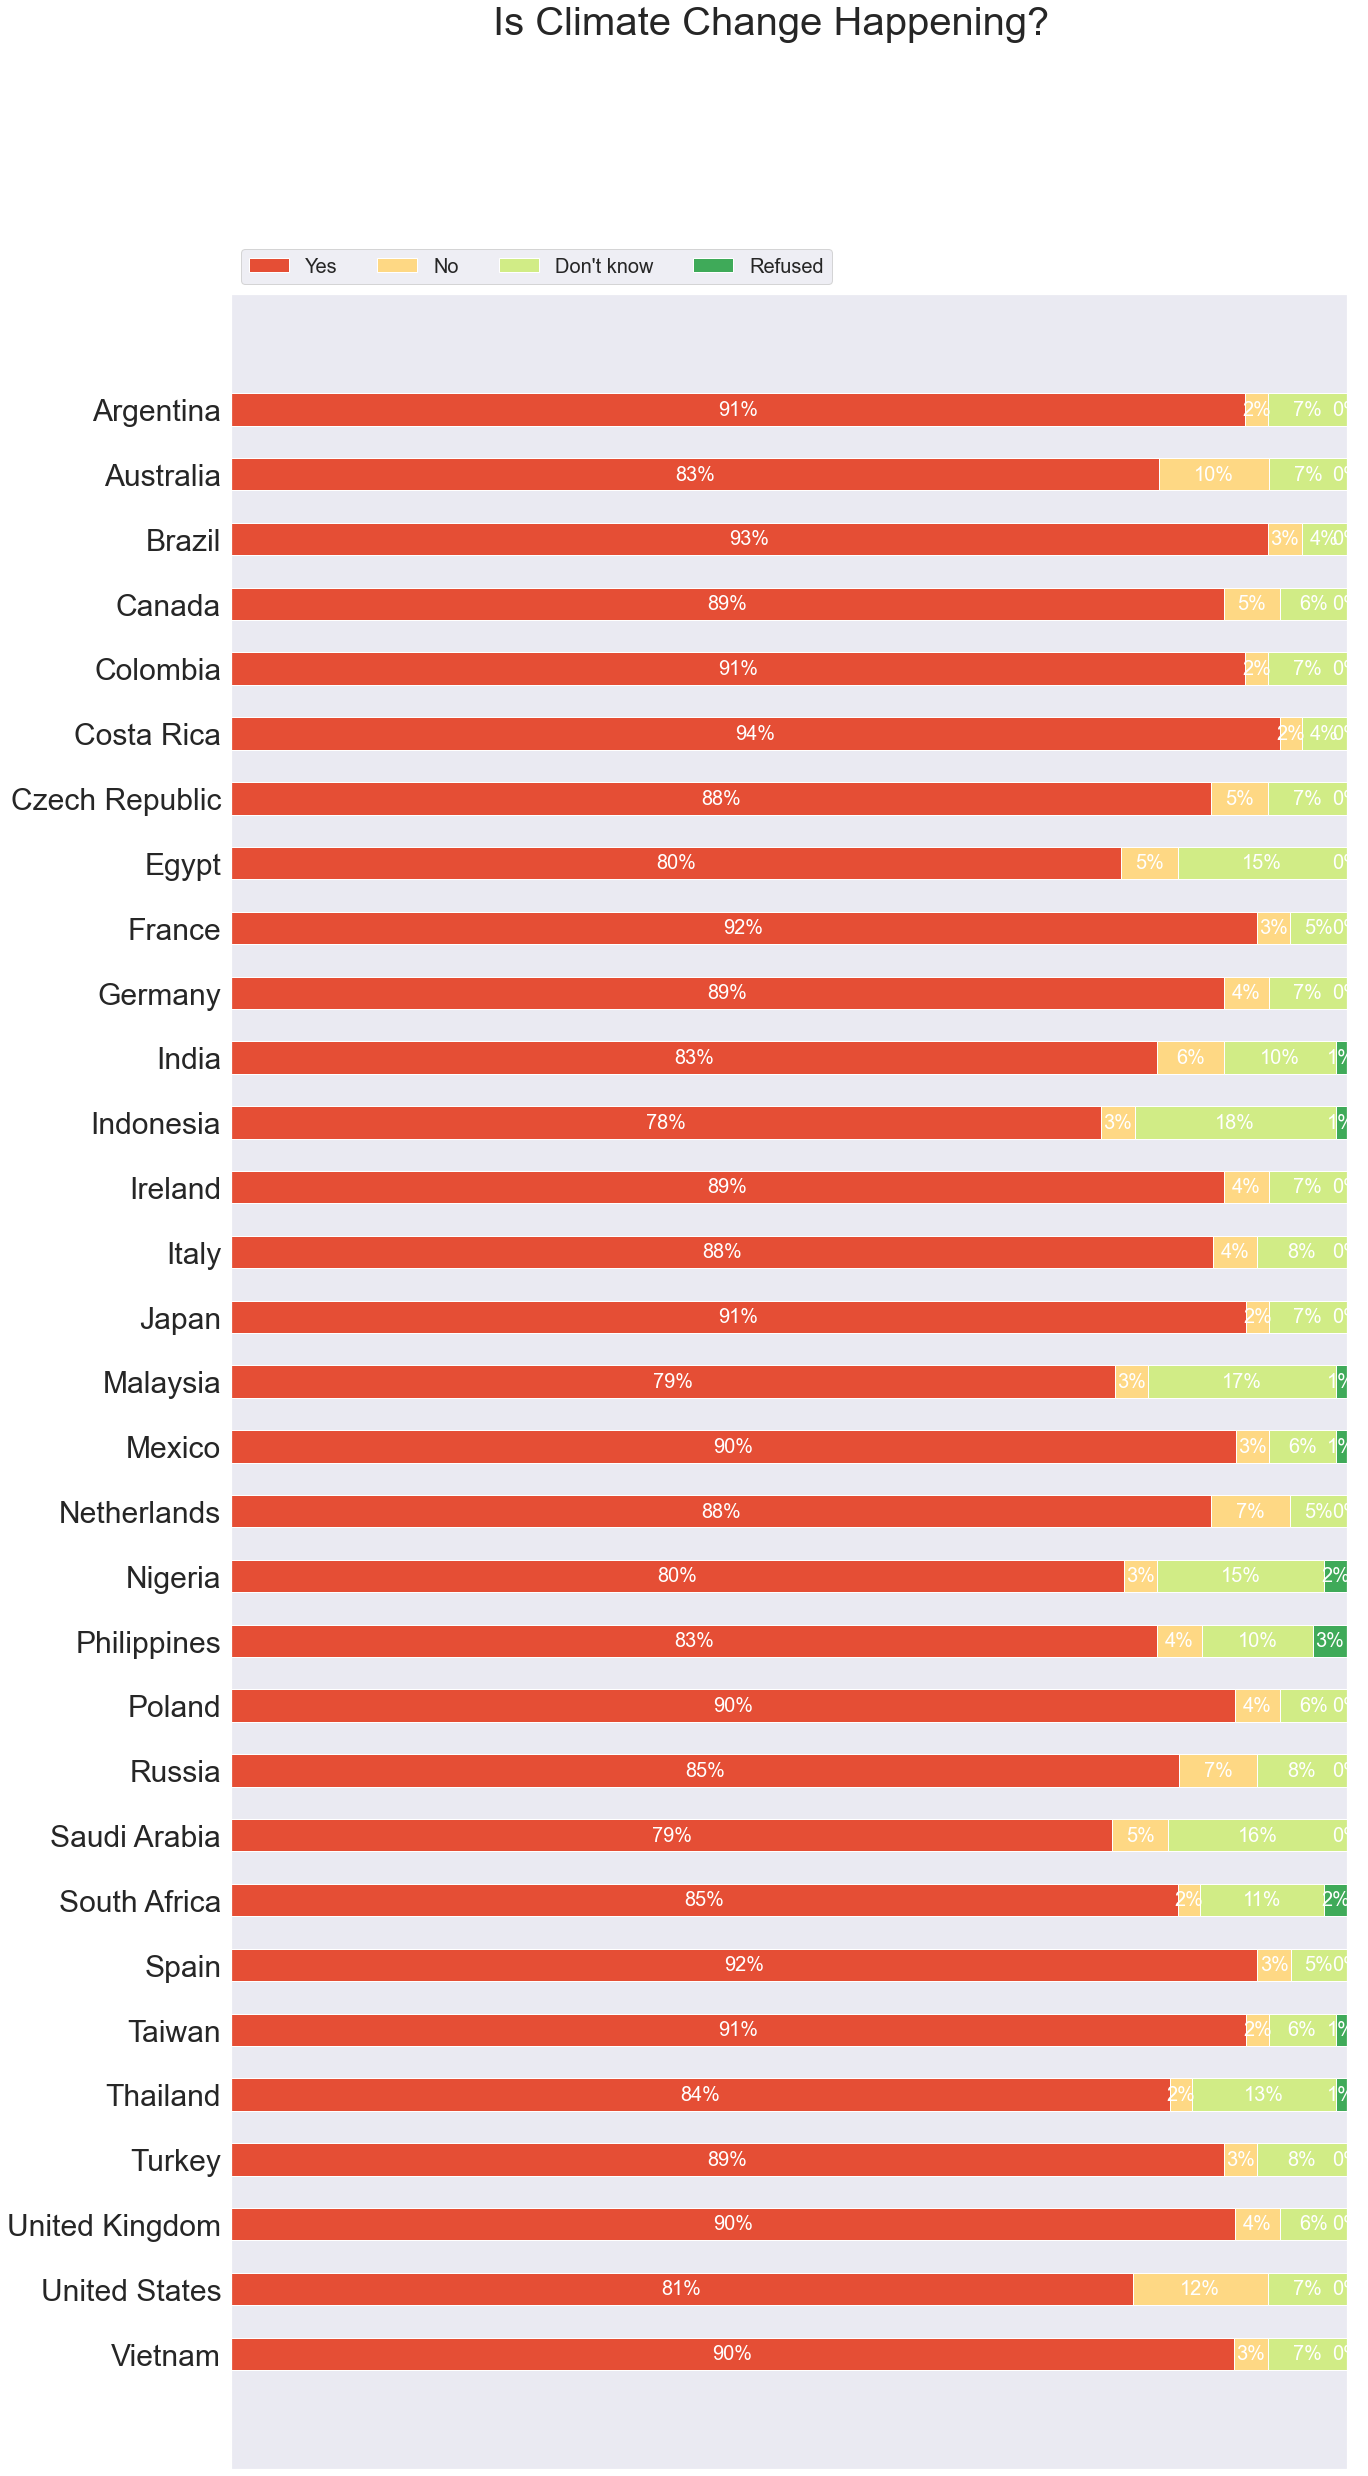

In [66]:
questions = happening.iloc[:-1, 0]
happening_data = happening.iloc[:-1, 1:]
happening_frac = happening_data.transpose().apply(lambda row: row / sum(row), axis=1)
survey(happening_frac, questions, "Is Climate Change Happening?")

The last results from the survey that will be included in this project is how the participants believe that their government should prioritize fighting the climate change. It seems like that a large portion believes that the government should prioritize it *very high*. Columbia as the country with 65% of the most participants believing that their country should prioritize it very highly followed by Costa Rica and Mexico at 61% and 60%. 

(<Figure size 1440x2880 with 1 Axes>, <AxesSubplot:>)

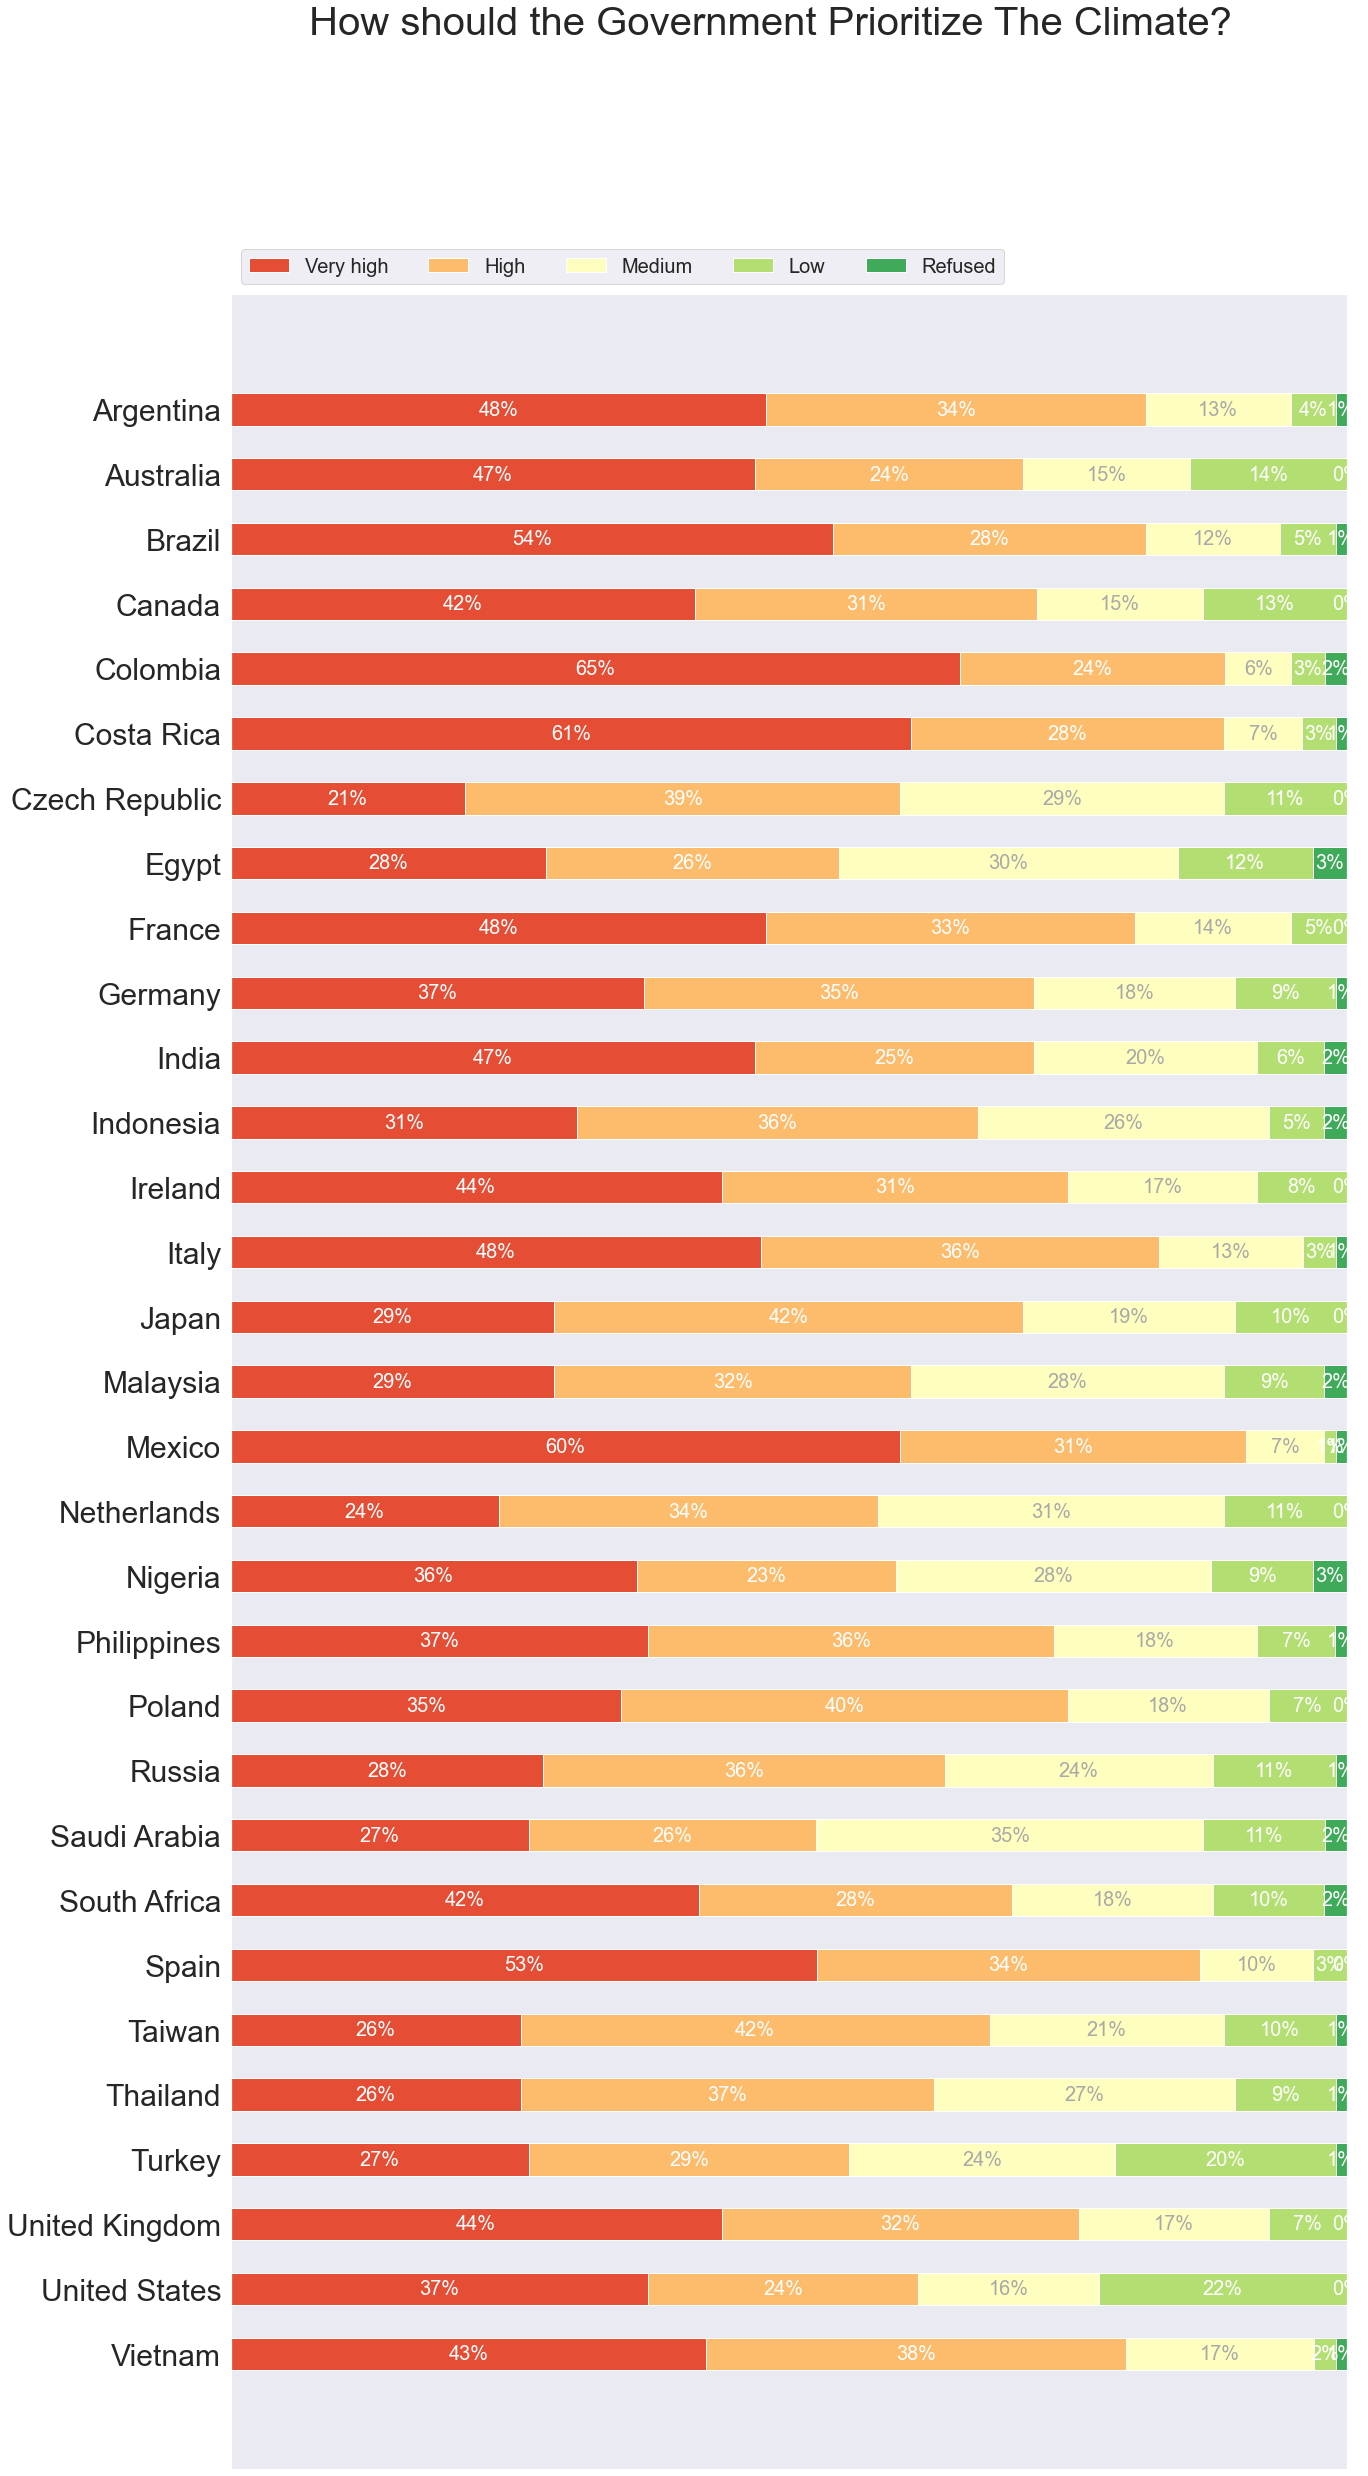

In [67]:
questions = gov_priority.iloc[:-1, 0]
priority_data = gov_priority.iloc[:-1, 1:]
priority_frac = priority_data.transpose().apply(lambda row: row / sum(row), axis=1)
survey(priority_frac, questions, "How should the Government Prioritize The Climate?")

Looking at the top 10 largest countries, w.r.t. population, and their greenhouse gas emission, we see in the following plot that their emission has been increasing since 1970. It may be hard to read of the first figure, thus a second figure with a log scale is made. It shows that all countries have had an increase in greenhouse gas emission and moreover it seems that it is exponentially increasing for countries such as China (CHN), India (IND), Indonesia (IDN), Pakistan (PAK) and Bangladash (BGR). 

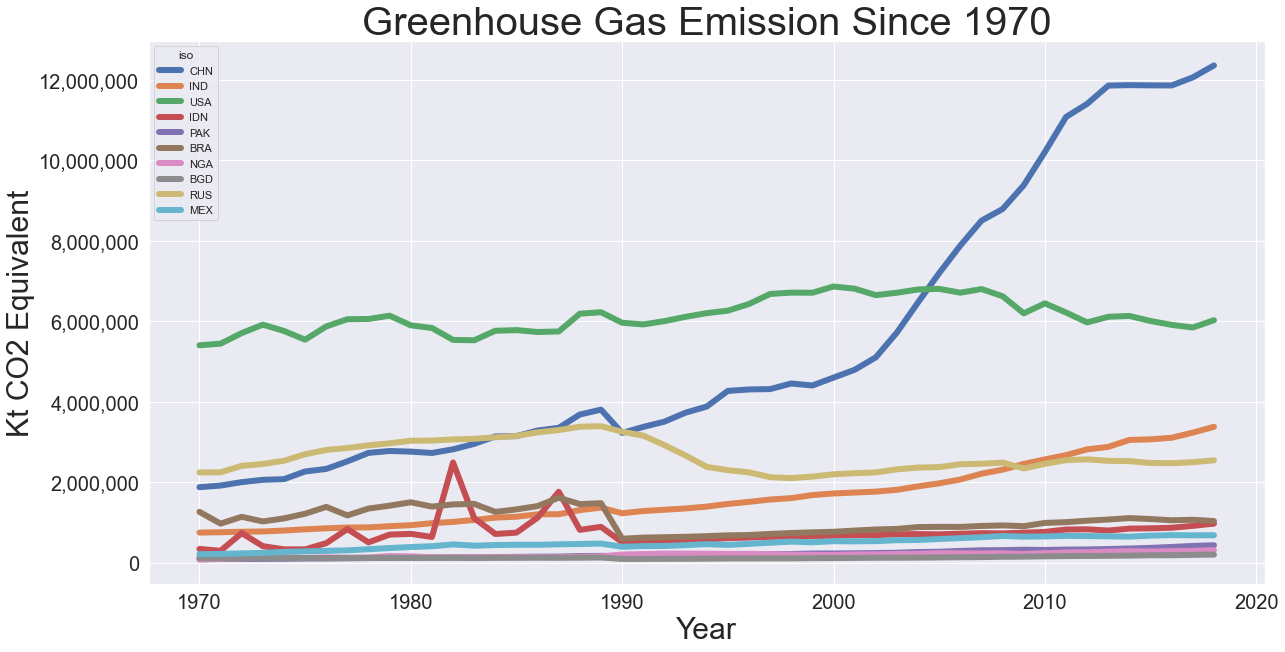

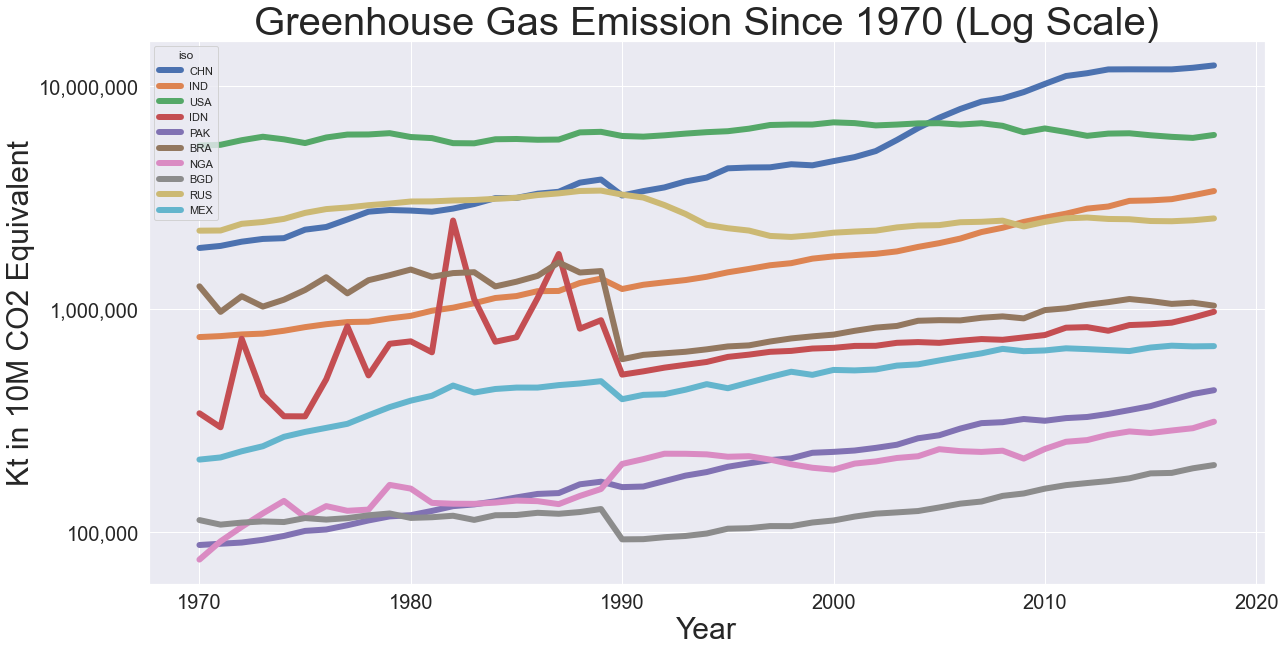

In [68]:
top10_largest = population.loc[iso_codes, '2020'].nlargest(n=10).index
top10_largest

years = [str(year) for year in np.arange(1960, 2021)]

fig, ax = plt.subplots(figsize=(20, 10))
gh_emission.loc[top10_largest, years].T.plot(ax=ax, linewidth=6, linestyle='-')
plt.title('Greenhouse Gas Emission Since 1970', fontsize=40)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Kt CO2 Equivalent', fontsize=30)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ticks = plt.xticks(fontsize=20)
ticks = plt.yticks(fontsize=20)

fig, ax = plt.subplots(figsize=(20, 10))
gh_emission.loc[top10_largest, years].T.plot(ax=ax, linewidth=6, linestyle='-')
plt.yscale('log')
plt.title('Greenhouse Gas Emission Since 1970 (Log Scale)', fontsize=40)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Kt in 10M CO2 Equivalent', fontsize=30)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ticks = plt.xticks(fontsize=20)
ticks = plt.yticks(fontsize=20)

fig.savefig("images/gasemiss_log")

Since we just saw that the greenhouse gas emission for China, India, Indonesia, Pakistan and Bangladash is exponentially increasing, it is interesting to check whether their population is exponentially increasing as well. This is what is shown in the following plot. As it seems, none of the mentioned countries seems to be increasing exponentially. From the plot, it seems that only Nigeria has an exponential increasing population but they didn't have an exponentially increasing gas emission, however. 

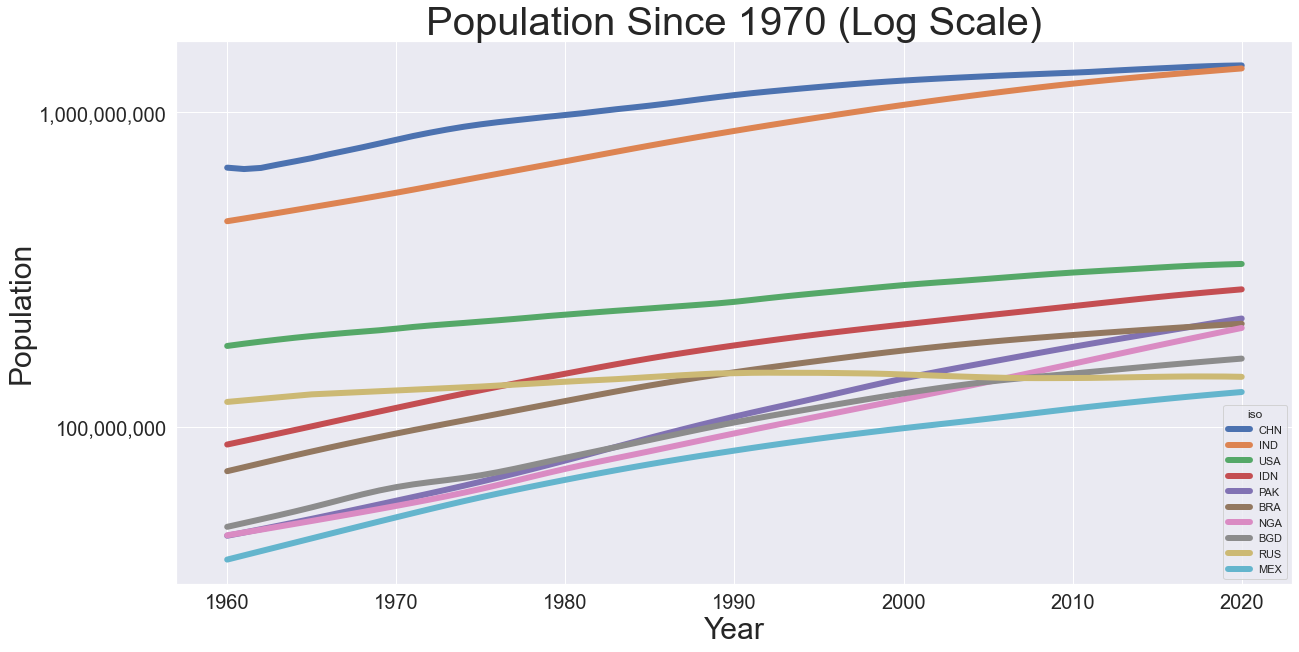

In [69]:
fig, ax = plt.subplots(figsize=(20, 10))
population.loc[top10_largest, years].T.plot(ax=ax, linewidth=6, linestyle='-')
plt.title('Population Since 1970 (Log Scale)', fontsize=40)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Population', fontsize=30)
plt.yscale('log')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ticks = plt.xticks(fontsize=20)
ticks = plt.yticks(fontsize=20)

fig.savefig("images/population_log")

Since the exponential increase in gas emission was not explained by the population, we shift our focus to the GDP (gross domestic product). As the figure shows, China, India, Indonesia, Bangladash and perhaps also Pakistan all have an exponential increase of growth in their economy. China in fact has a growth faster than exponential - same as their gas emissions. One could therefore believe that economic growth is a bigger factor in gas emission than population. 

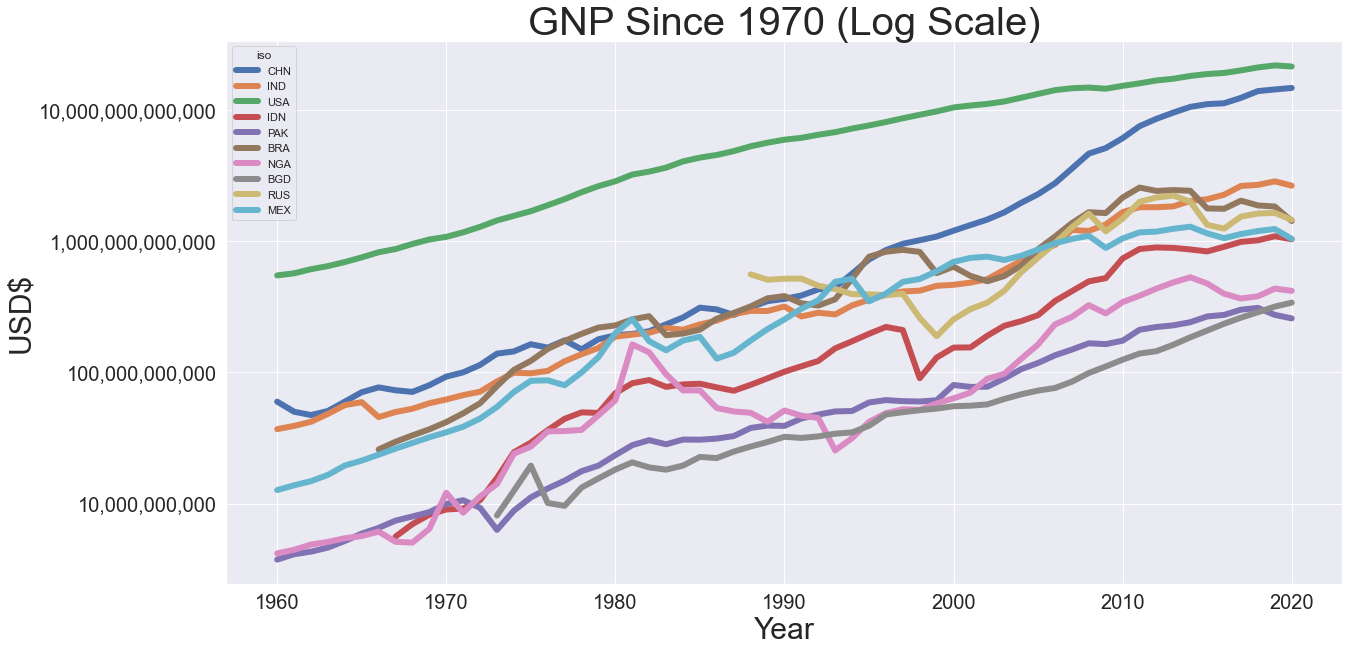

In [70]:
fig, ax = plt.subplots(figsize=(20, 10))
gnp.loc[top10_largest, years].T.plot(ax=ax, linewidth=6, linestyle='-')
plt.title('GNP Since 1970 (Log Scale)', fontsize=40)
plt.xlabel('Year', fontsize=30)
plt.ylabel('USD$', fontsize=30)
plt.yscale('log')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ticks = plt.xticks(fontsize=20)
ticks = plt.yticks(fontsize=20)

fig.savefig("images/gnp_log")

Let's aggregate the data into regions and see can be seen here. First, we plot the gas emission per country aggregated into continents. It is clear that Asia accounts for most of the gas emissions in the world followed by Americas. Something interesting happened in 1990 in the data collection since it seems that the gas emission aggresively fell in value. According to the [World Bank](https://data.worldbank.org/indicator/EN.ATM.GHGT.KT.CE), the data was collected by Carbon Dioxide Information Analysis Center up till 1990 and hereafter it was collected by Climate Watch. There seems to be no explanation to how the measured differently but the reason is most likely due to a change in measurements. 

In [71]:
fig = px.area(data, x="year", y="gh_emission", color="region", line_group="country")
fig.update_xaxes(tickfont_size=15)
fig.update_yaxes(tickfont_size=15)
fig.update_xaxes(range=[1970, 2018])
fig.update_layout(xaxis_title="Year", yaxis_title="CO2 Equivalent [Kt]", title_text="Greenhouse Gas Emission Since 1970", title_font_size=20, title_x=0.5)
fig.write_html("images/gas_emission.html")
fig.write_json("images/gas_emission.json")
fig.write_image("images/gas_emission.png")
fig.show()

Next we see the GDP growth for all countries, aggregated into their belonging continents. Not so obvious is that Asia has ended up with the largest GDP amongst all continents followed by America and Europe. Again we see that the United States has the biggest economy in the recent years followed by China with the second largest. 

In [72]:
fig = px.area(data, x="year", y="gnp", color="region", line_group="country")
fig.update_xaxes(tickfont_size=15)
fig.update_yaxes(tickfont_size=15)
fig.update_layout(xaxis_title="Year", yaxis_title="GDP [USD$]", title_text="GDP Since 1960", title_font_size=20, title_x=0.5)
fig.write_html("images/gdp.html")
fig.write_image("images/gdp.png")
fig.write_json("images/gdp.json")
fig.show()

The next plot shows the population growth in each continent. Here it is very obvious that Asia is by far the largest continent w.r.t population with a large margin to the second largest; Africa. 

In [73]:
fig = px.area(data, x="year", y="population", color="region", line_group="country")
fig.update_xaxes(tickfont_size=15)
fig.update_yaxes(tickfont_size=15)
fig.update_layout(xaxis_title="Year", yaxis_title="Population", title_text="Population Since 1960", title_font_size=20, title_x=0.5)
fig.write_html("images/population.html")
fig.write_image("images/population.png")
fig.write_json("images/population.json")
fig.show()

To go more in depth in analyzing the individual countries, it could be nice to make a bar plot that shows the progression over time for each country. Therefore, the following function will make a top 15 plot of the countries with the highest values in predefined features such as GDP, population, gas emission etc. 

In [74]:
colors = plt.cm.gist_rainbow(range(len(data.country.unique())))[:, :3]
np.random.shuffle(colors)
colors_df = pd.DataFrame(colors, index=data.country.unique())

def live_bar_plot_animation(df, feature, title):

    df = df.copy()
    data4anim = pd.DataFrame(columns=df.country.unique(), index=df.year.unique())
    df.set_index(['year', 'country'], inplace=True)
    for country in data4anim.columns:
        for year in data4anim.index:
            data4anim.loc[year, country] = df.loc[(year, country)][feature]
    
    df = data4anim.copy()
    df.fillna(0, inplace=True)
    
    df = df.reset_index()
    df = df.rename(columns={'index': 'year'})
    
    df.index = df.index * 3
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    
    df_expanded['year'] = df_expanded['year'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('year')
    
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    
    df_rank_expanded = df_rank_expanded.interpolate()
    
    matplotlib.rcParams['animation.embed_limit'] = 200
    
    def nice_axes(ax):
        ax.set_facecolor('.8')
        ax.tick_params(labelsize=25, length=0)
        ax.grid(True, axis='x', color='white')
        ax.set_axisbelow(True)
        [spine.set_visible(False) for spine in ax.spines.values()]

    def init():
        ax.clear()
        nice_axes(ax)

    def update(i):
        for bar in ax.containers:
            bar.remove()
        y = df_rank_expanded.iloc[i].nlargest(15)
        width = df_expanded.iloc[i][y.index]
        col = colors_df.loc[y.index].values
        ax.barh(y=y, width=width, color=col, tick_label=y.index)
        date_str = df_expanded.index[i]
        ax.set_title(f'{title} - {date_str}', fontsize=30)

    fig = plt.Figure(figsize=(40, 20), dpi=144)
    ax = fig.add_subplot()
    anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), interval=100, repeat=False)
    return anim

If we start with GDP, we will see that the United States since 1960 has always been the world's biggest economy. And France, Japan and Germany have been the second largest before China suddenly got a fast growing ecnomy and quickly surpassed every country except for US. 

In [75]:
anim = live_bar_plot_animation(data, 'gnp', "Country GDP [USD$]")
#HTML(anim.to_jshtml())

Next we look at the population growth for the top 15 countries at each year. The positions are much more stable in this plot than in the previous with GDP. However, one thing that I personally didn't notice before is how India seems to surpass China in population in the near future. 

In [76]:
anim = live_bar_plot_animation(data, 'population', "Country Population")
#HTML(anim.to_jshtml()

Lastly, we will present the greenhouse emission for each country per year. It is clear that US, Russia, and China were the countries with the most emission before the US and China speeded up and were clearly the two most emitting countries in the world which interestingly also are the two richest countries.  

In [77]:
anim = live_bar_plot_animation(data, 'gh_emission', "Greenhouse Gas Emission [Kt CO2 Equivalent]")
#HTML(anim.to_jshtml())

In [93]:
def plot_choropleth(data, pop, iso_codes, year, per_capita=False, scale=1, color_bar_title="", color_bar_units="", title="", source_link="", source_name=""):
    year = str(year)
    data = data.loc[iso_codes, [year, 'Country Name']]
    pop = pop.loc[iso_codes, year]
    
    fig = go.Figure(data=go.Choropleth(
    locations = data.index,
    z = data.loc[:, year] / scale / pop if per_capita else data.loc[:, year] / scale,
    text = data.loc[:, 'Country Name'],
    colorscale = 'Blues',
    autocolorscale=True,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = '{}<br>{}'.format(color_bar_title, color_bar_units),
    ))

    fig.update_layout(
        title_text='{} {}'.format(year, title),
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="{}">\
                {}</a>'.format(source_link, source_name),
            showarrow = False
        )]
    )
    
    fig.write_json("images/worldmap_{}_{}.json".format(title.replace(" ", "_"), year))
    fig.write_html("images/worldmap_{}_{}.html".format(title.replace(" ", "_"), year))
    fig.write_image("images/worldmap_{}_{}.png".format(title.replace(" ", "_"), year))
    fig.show()

In [94]:
def correlation_test(data1, data2, iso_codes, population, year, color_code=None, color_code_per_cap=False, color_bar_title="", per_capita=[False, False], yscale='linear',data1_name="", data2_name=""):
    
    year = str(year)
    
    population = population.loc[iso_codes, year]
    
    color_code = color_code.loc[iso_codes, year] / population if color_code_per_cap else color_code.loc[iso_codes, year] if color_code is not None else None
    data1 = data1.loc[iso_codes, year] / population if per_capita[0] else data1.loc[iso_codes, year]
    data2 = data2.loc[iso_codes, year] / population if per_capita[1] else data2.loc[iso_codes, year]
    
    df = pd.concat([data1, data2], axis=1).dropna(how='any', axis=0)
    corr_coef, p_val = pearsonr(df.iloc[:, 0], df.iloc[:, 1])
    
    plt.figure(figsize=(20,10))

    plt.scatter(data1, data2, s=40, c=color_code, cmap='magma')

    if color_code is not None:
        cbar = plt.colorbar()
        cbar.set_label(color_bar_title)
        
    plt.title(data1_name + " as a function of " + data2_name, fontsize=30)
    plt.xlabel(data1_name, fontsize=25)
    plt.ylabel(data2_name, fontsize=25)
    plt.yscale(yscale)
    plt.savefig("images/correlation_{}_{}".format(data1_name.replace(" ", "_"), data2_name.replace(" ", "_")))
    plt.show()
    data1_name = data1_name + " per capita" if per_capita[0] else data1_name
    data2_name = data2_name + " per capita" if per_capita[1] else data2_name
    print("Correlation between {} and {}:: {}".format(data1_name, data2_name, round(corr_coef, 4)))
    print("p-value:: {}".format(round(p_val, 4)))

# Data Analysis

Now we have looked at the basic data presentations. A few things that popped out is that rich and highly populated countries tend to emit more greenhouse gasses than poor countries which may not sound too surprising. Nevertheless, this is a statement which will be analyzed further. 

Moreover, we have seen in the previous plot that some countries are very exposed to rising sea levels. E.g. Netherlands where more than 50% over their population lives in areas that is below 5 meters above the sea level. Moreover, countries like Vietnam, Egypt, Latvia and few more are also highly exposed to a rising sea level. Thus it will be interesting to analyze whether more exposed countries do more to fight climate change. E.g. switch to sustainable energy sources. 

Lastly, it will be checked what factors influence a country's greenhouse gas emission. Among these factors, we will use GDP, population and exposed population. It is not possible to include the answers from the survey since the number of represented countries is small and also because the survey was conducted in 2021 - much later than the data from the other sources was collected. 

## Rich and Big Countries - Should we Blame them for the Climate Change?

The first question whether the rich and big countries has a bigger impact on the climate is what we'll answer here. The following plot shows the GDP in USD$ per country in 2018. As we already know from before, US and China are by far the biggest economies in the world which is clearly represented in the plot. 

In the next plot the population is shown per country, also in 2018. Which also shows how India and China are clearly the most populated countries followed by Indonesia, US and Brazil. 

And lastly we have the total greenhouse gas emission per country in 2018. It seems clear that the US and China are the top two emitters followed by India and Russia. So at first glance, it is very clear that the rich and populated countries are also the ones that emits the most greenhouse gases into the athmosphere.  

In [95]:
plot_choropleth(data=gnp, pop=population, iso_codes=iso_codes, year=2018, scale=10**9, color_bar_title="GDP", color_bar_units="Billions USD$", title="Global GDP")
plot_choropleth(data=population, pop=population, iso_codes=iso_codes, year=2018, per_capita=False, color_bar_title="Population", color_bar_units="", title="Global Population")
plot_choropleth(data=gh_emission, pop=population, iso_codes=iso_codes, year=2018, per_capita=False, color_bar_title="Greenhouse Emission", color_bar_units="Kt CO2 Equivalent", title="Global Greenhouse Gas Emission")

The above figures shows clearly that a bigger economy and population leads to more greenhouse gas emissions which is not surprising. However, if we normalize the gas emissions by population and GDP, we get a better way of comparing the countries. 

First, we have the GDP per capita in the first plot. The Westeren countries in Europe, North America and Australia clearly stands out as being richer per capita than the rest of the world with Norway and Switzerland in the top with 85,000$ and 82,000$, respectively per capita. Also notice how countries like Russia and China are in the lower end with 11,000$ and 9,860$ per capita. 

The next plot then shows the gas emission per capita. And it seems to be full of surpirses. E.g. one can see that China has a lower emission per capita compared to Denmark, US, Canada and Germany. Also it shows that Australia, United Arab Emirates and Turkemistan are the top greenhouse gas emitters per capita in the world in 2018. 

Lastly, we see a plot of gas emission per GDP for each country in 2018. It seems to be equally distirbuted but this is because a few countries such as Central Africa, Chad and Pakistan have very high values. If examining the plot futher, one will see that China has a 3x higher value than US and China has more than 7x higher value than Denmark. In the most extreme case we also find that Central Africa has a 36x higher value than Switzerland. 

In [96]:
plot_choropleth(data=gnp, pop=population, iso_codes=iso_codes, year=2018, per_capita=True, color_bar_title="GDP", color_bar_units="USD$", title="Global GDP per Capita")
plot_choropleth(data=gh_emission, pop=population, iso_codes=iso_codes, year=2018, per_capita=True, color_bar_title="Greenhouse Emission", color_bar_units="Kt CO2 Equivalent", title="Global Greenhouse Gas Emission per Capita")
plot_choropleth(data=gh_emission, pop=gnp, iso_codes=iso_codes, year=2018, per_capita=True, color_bar_title="Greenhouse Emission", color_bar_units="Kt CO2 Equivalent", title="Global Greenhouse Gas Emission per GDP")

As we saw before, it was quite clear that a higher GDP lead to a higher gas emission. Now we want to show this quantitatively by computing the correlation between the two factors. The following plot shows the scatter plot of GDP and gas emission. It does show a nice upward trend with a correlation of 0.8328. The statistical test for signficance of the correlation being different from 0 is 0.0 (with 5 decimals) and thus it can be concluded that the relation between GDP and gas emission is highly correlated. 

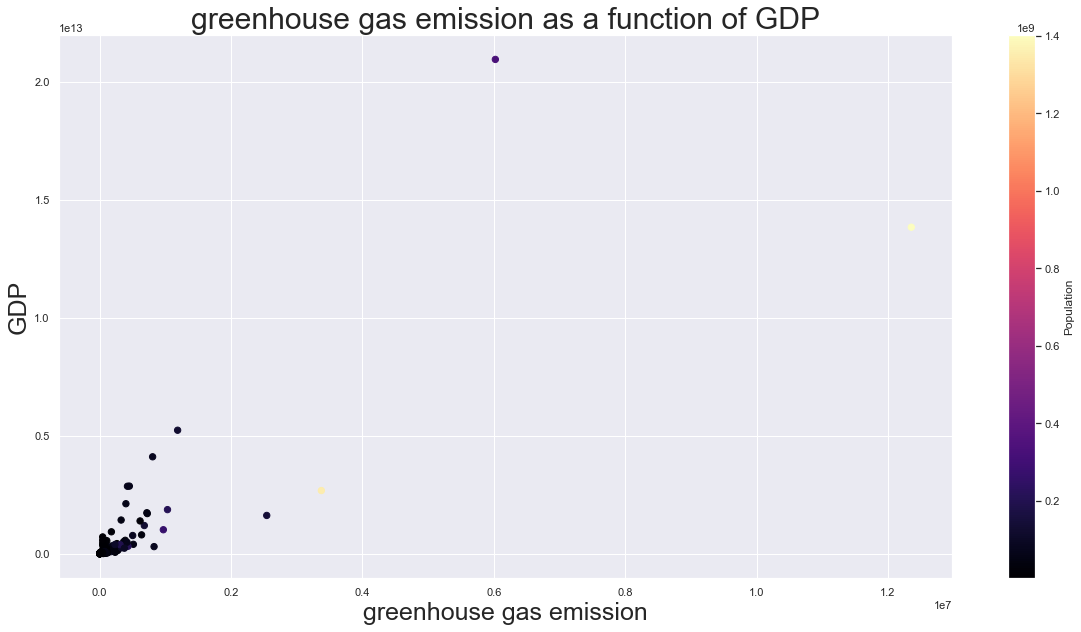

Correlation between greenhouse gas emission and GDP:: 0.8328
p-value:: 0.0


In [97]:
correlation_test(data1=gh_emission, data2=gnp, iso_codes=iso_codes, population=population, year=2018, color_code=population, color_code_per_cap=False, color_bar_title="Population", per_capita=[False, False], data1_name="greenhouse gas emission", data2_name="GDP")

We'll repeat the same test for testing the relation between gas emission and population. The following plot shows the scatter plot of GDP and gas emission. It does show a nice upward trend with a correlation of 0.8348. The statistical test for signficance of the correlation being different from 0 is 0.0 (with 5 decimals) and thus it can be concluded that the relation between population and gas emission is highly correlated. 

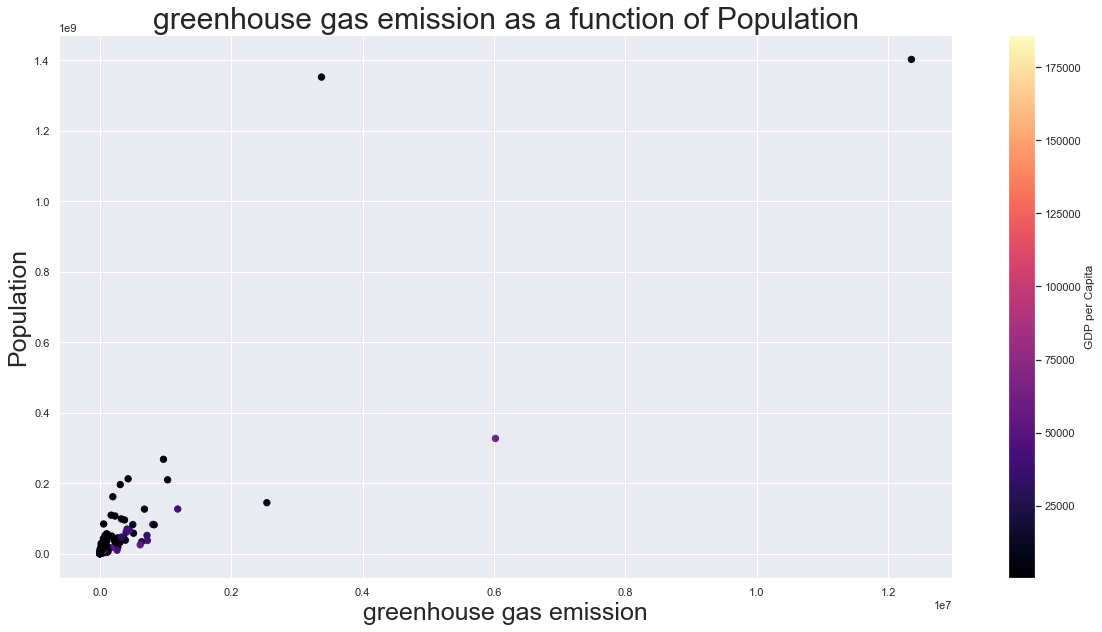

Correlation between greenhouse gas emission and Population:: 0.8348
p-value:: 0.0


In [98]:
correlation_test(data1=gh_emission, data2=population, iso_codes=iso_codes, population=population, color_code=gnp, color_code_per_cap=True, color_bar_title="GDP per Capita", year=2018, per_capita=[False, False], data1_name="greenhouse gas emission", data2_name="Population")

It wasn't clear whether rich countries, i.e. countries with a high GDP per capita, were correlated with emission per capita. Therefore the following plot shows that exact test. And again, it seems that richer countries have a higher emission per capita than poorer countries with a correlation of 0.4345 and a p-value of 0.0. Which again means that the relation is highly signifcant. 

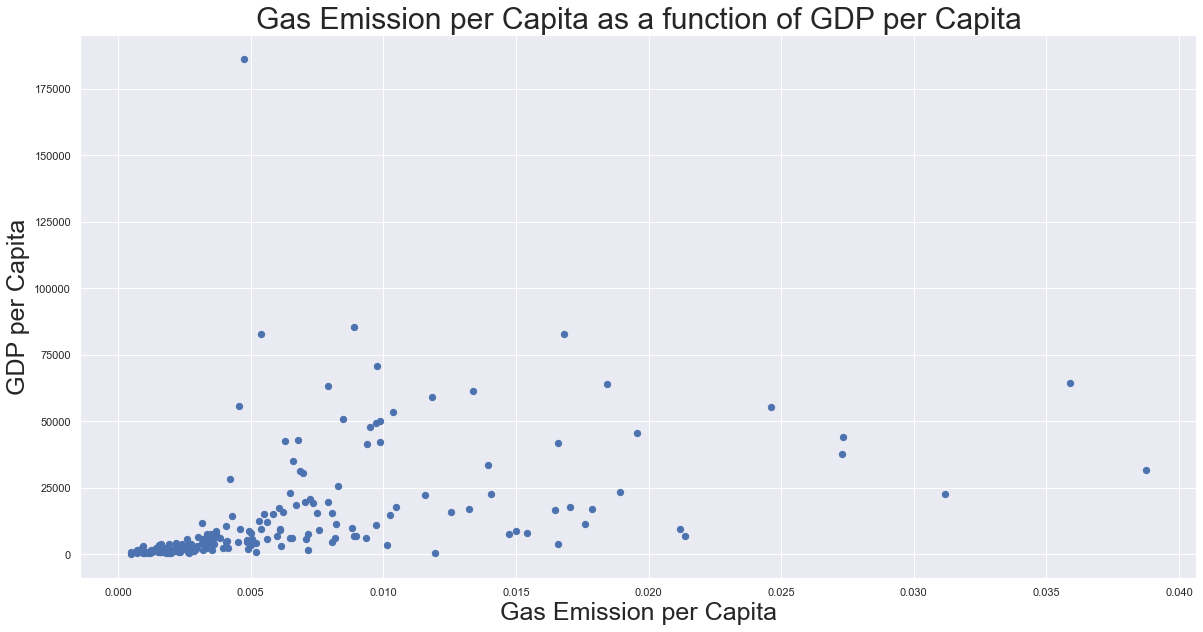

Correlation between Gas Emission per Capita per capita and GDP per Capita per capita:: 0.4345
p-value:: 0.0


In [99]:
correlation_test(data1=gh_emission, data2=gnp, iso_codes=iso_codes, population=population, year=2018, per_capita=[True, True], data1_name="Gas Emission per Capita", data2_name="GDP per Capita")

One question is whether highly populated countries are emitting more gas than smaller countries. In other words; does the energy consumption behavior change when a country reaches a certain size where countries are forced to consume not climate friendly energy since there is a scarcity of climate friendly resources. Therefore the following cell tests for a relation between gas emission per capita and population. Looking at the plot, there seems to be no trend in any direction which is also what the correlation at -0.0238 reflects. The p-value is 0.7535, which means that the hypothesis about the actual correlation being 0 cannot be rejected. 

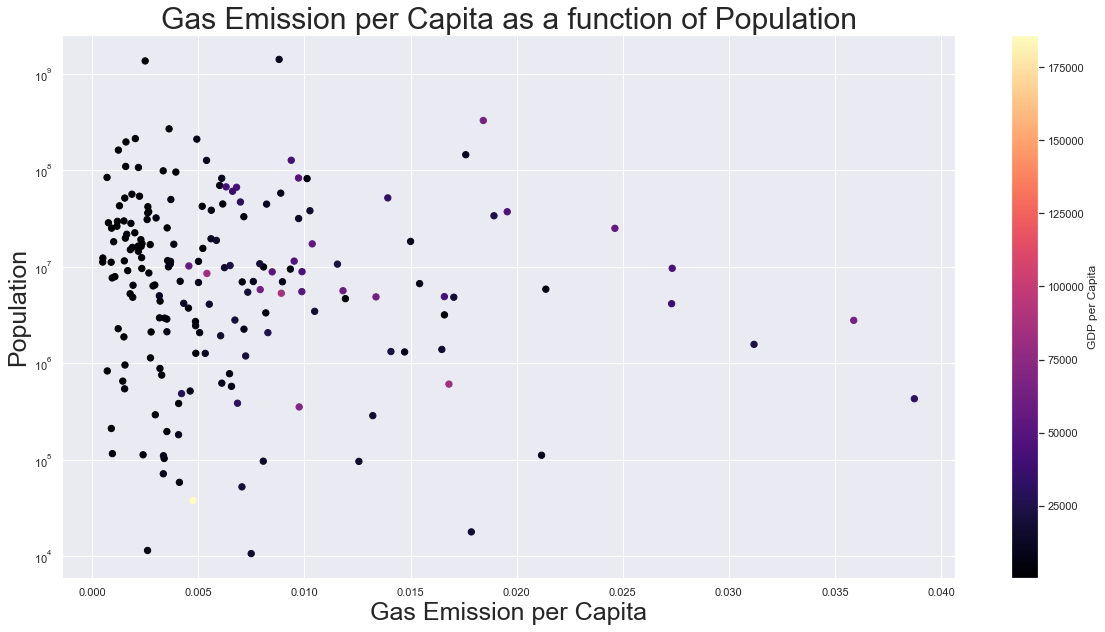

Correlation between Gas Emission per Capita per capita and Population:: -0.0238
p-value:: 0.7435


In [100]:
correlation_test(data1=gh_emission, data2=population, color_code=gnp, color_code_per_cap=True, color_bar_title="GDP per Capita", iso_codes=iso_codes, population=population, year=2018, per_capita=[True, False], data1_name="Gas Emission per Capita", data2_name="Population", yscale='log')

## Are Exposed Countries Fighting to Save the Climate - And themselves?

Next, we'll look at whether the countries with the most exposure to rising sea levels, which is a consequence of climate change, do more the prevent the rising temperatures. Many have probably heard about how the Netherlands which has land areas below the sea level and how they are protecting their cities by build barriers in the sea to prevent overflooding during storms. 

Netherlands is however not the only exposed country in the world and thus we will try to answer whether these exposed countries are emitting less greenhouse gases into the athmosphere compared to the less exposed contries. 

The following cell shows top 20 countries of most and least exposed countries with respect to the fraction of the population that is exposed to rising sea levels. In the left figure, you'll see the most exposed countries with Netherlands as the most exposed country at almost 60% of their population who are exposed. Moreover, you have countries such as Maldives, Greenland, Vietnam Monaco and Egypt who also are highly exposed to rising sea levels. 

In contract, you have the least exposed countries to the left. Here it shows that countries such as Belarus, Switzerland, Ethiopia and Macedonia have no population living below 5 meters above the sea level. Thus they may not have an incentive to fight the climate change. 

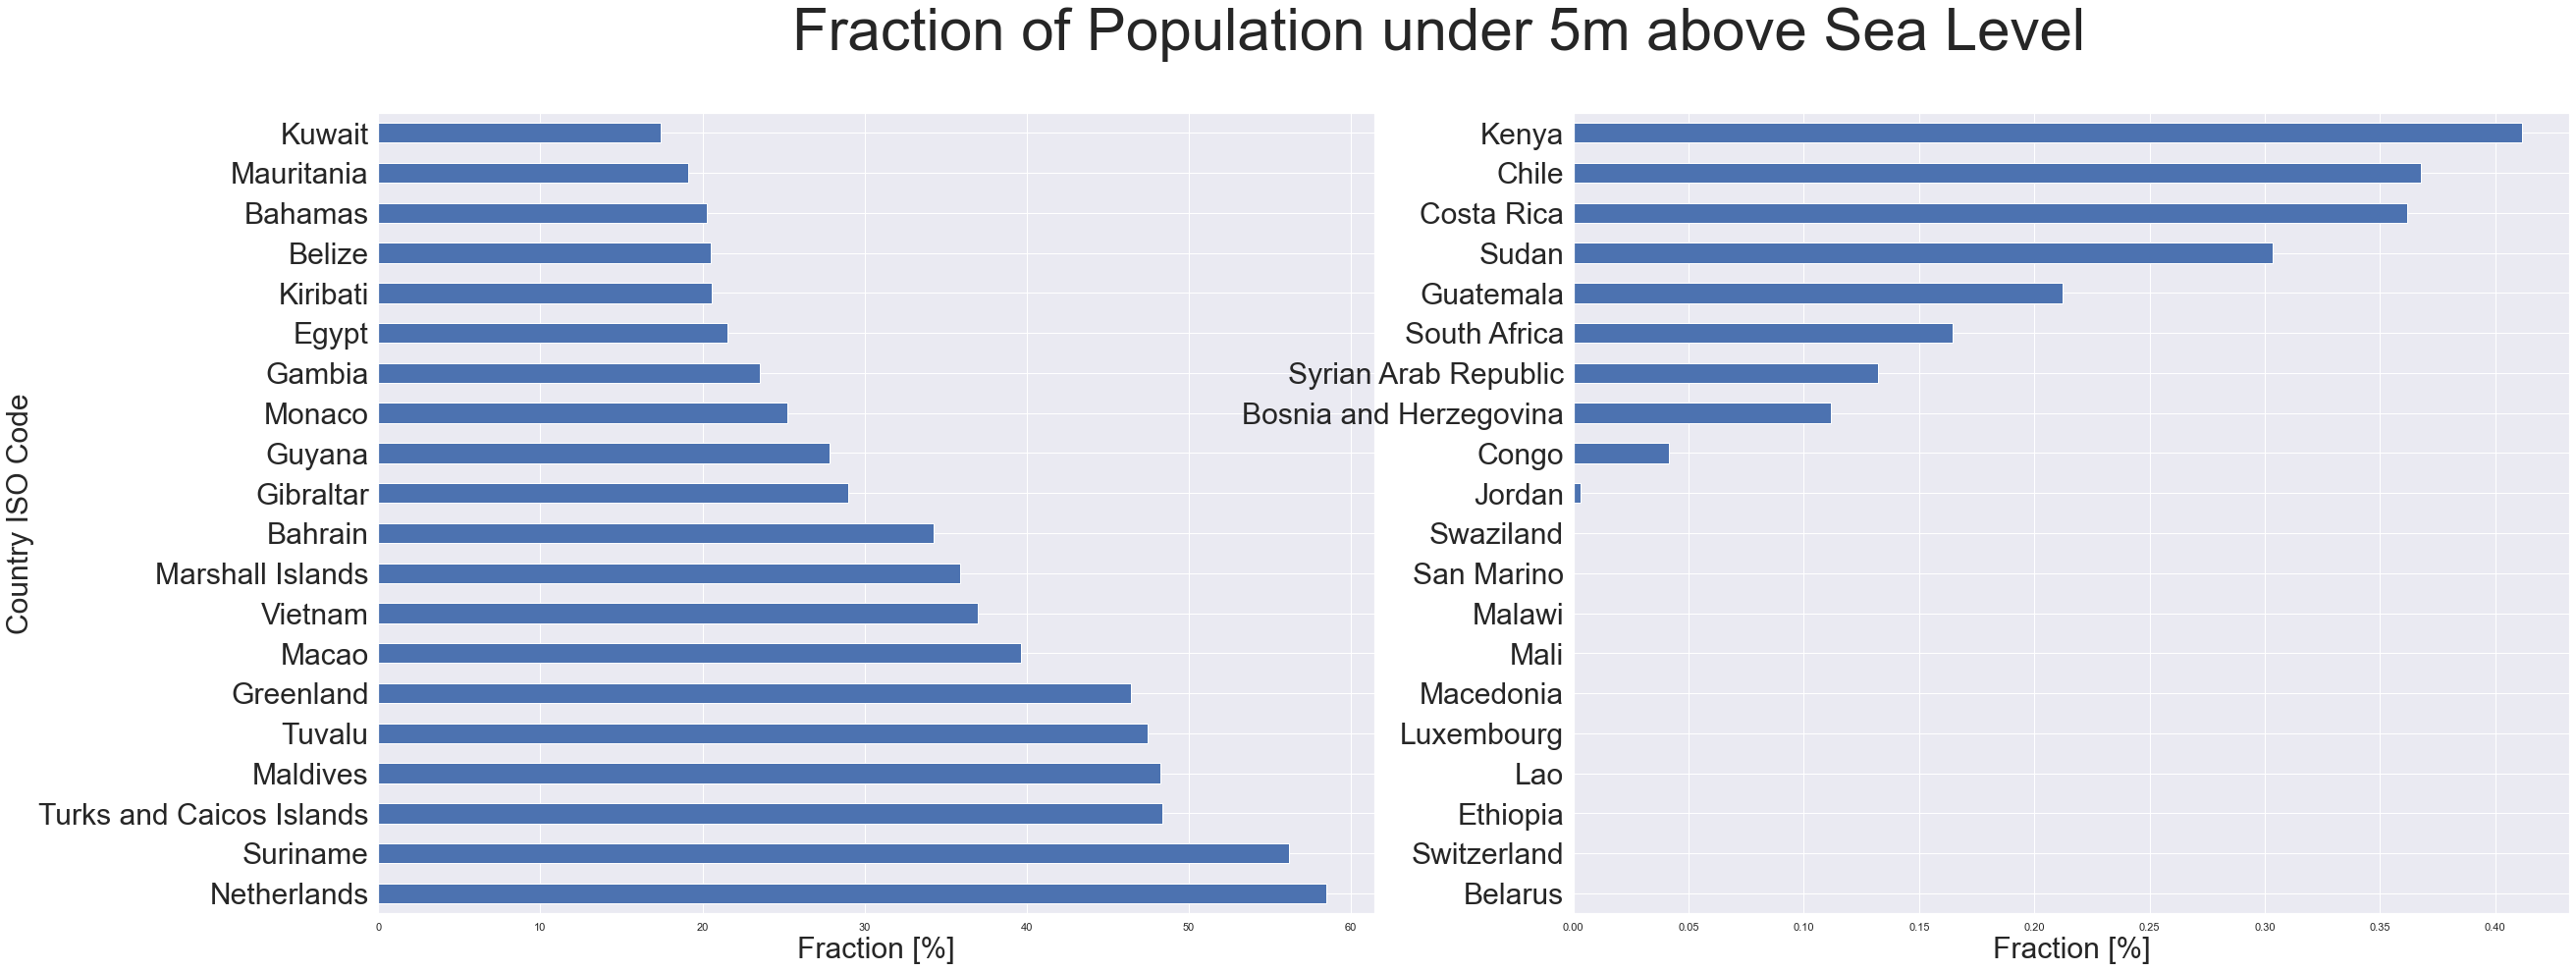

In [101]:
population_u5m = population_u5m.dropna(axis=1, how='all', inplace=False)
population_u5m = population_u5m.dropna(axis=0, how='any', inplace=False)
most_exposed_countries = population_u5m.loc[:, '2010'].nlargest(20)
least_exposed_countries = population_u5m.loc[:, '2010'].nsmallest(20)

most_exposed_countries_name = country_iso.loc[most_exposed_countries.index, 'country']
most_exposed_countries_name = [name.split(',')[0] for name in most_exposed_countries_name]
least_exposed_countries_name = country_iso.loc[least_exposed_countries.index, 'country']
least_exposed_countries_name = [name.split(',')[0] for name in least_exposed_countries_name]

figs, axs = plt.subplots(1, 2, figsize=(40, 15))
most_exposed_countries.plot(kind='barh', ax=axs[0])
axs[0].set_xlabel('Fraction [%]', fontsize=30)
axs[0].set_ylabel('Country ISO Code', fontsize=30)
axs[0].set_yticklabels(most_exposed_countries_name, fontsize=30)

least_exposed_countries.plot(kind='barh', ax=axs[1])
axs[1].set_ylabel('', fontsize=30)
axs[1].set_xlabel('Fraction [%]', fontsize=30)
axs[1].set_yticklabels(least_exposed_countries_name, fontsize=30)
x_ = plt.suptitle('Fraction of Population under 5m above Sea Level', fontsize=60)

figs.savefig("images/barh_highexposed_countries")
#figs[1].savefig("images/barh_lowexposed_countries")

If we plot the greenhouse gas emission of the most and least exposed countries, it seems that the most exposed countries emits more greenhouse gases per capita than the least exposed countries. However it is hard to compare all the countries with each other but from the plot it is clear than Bahrain and Kuwait has a higher carbon footprint than any other non-exposed countries even though Bahrain and Kuwait has around 35% and 18% of their population exposed to rising sea levels. 

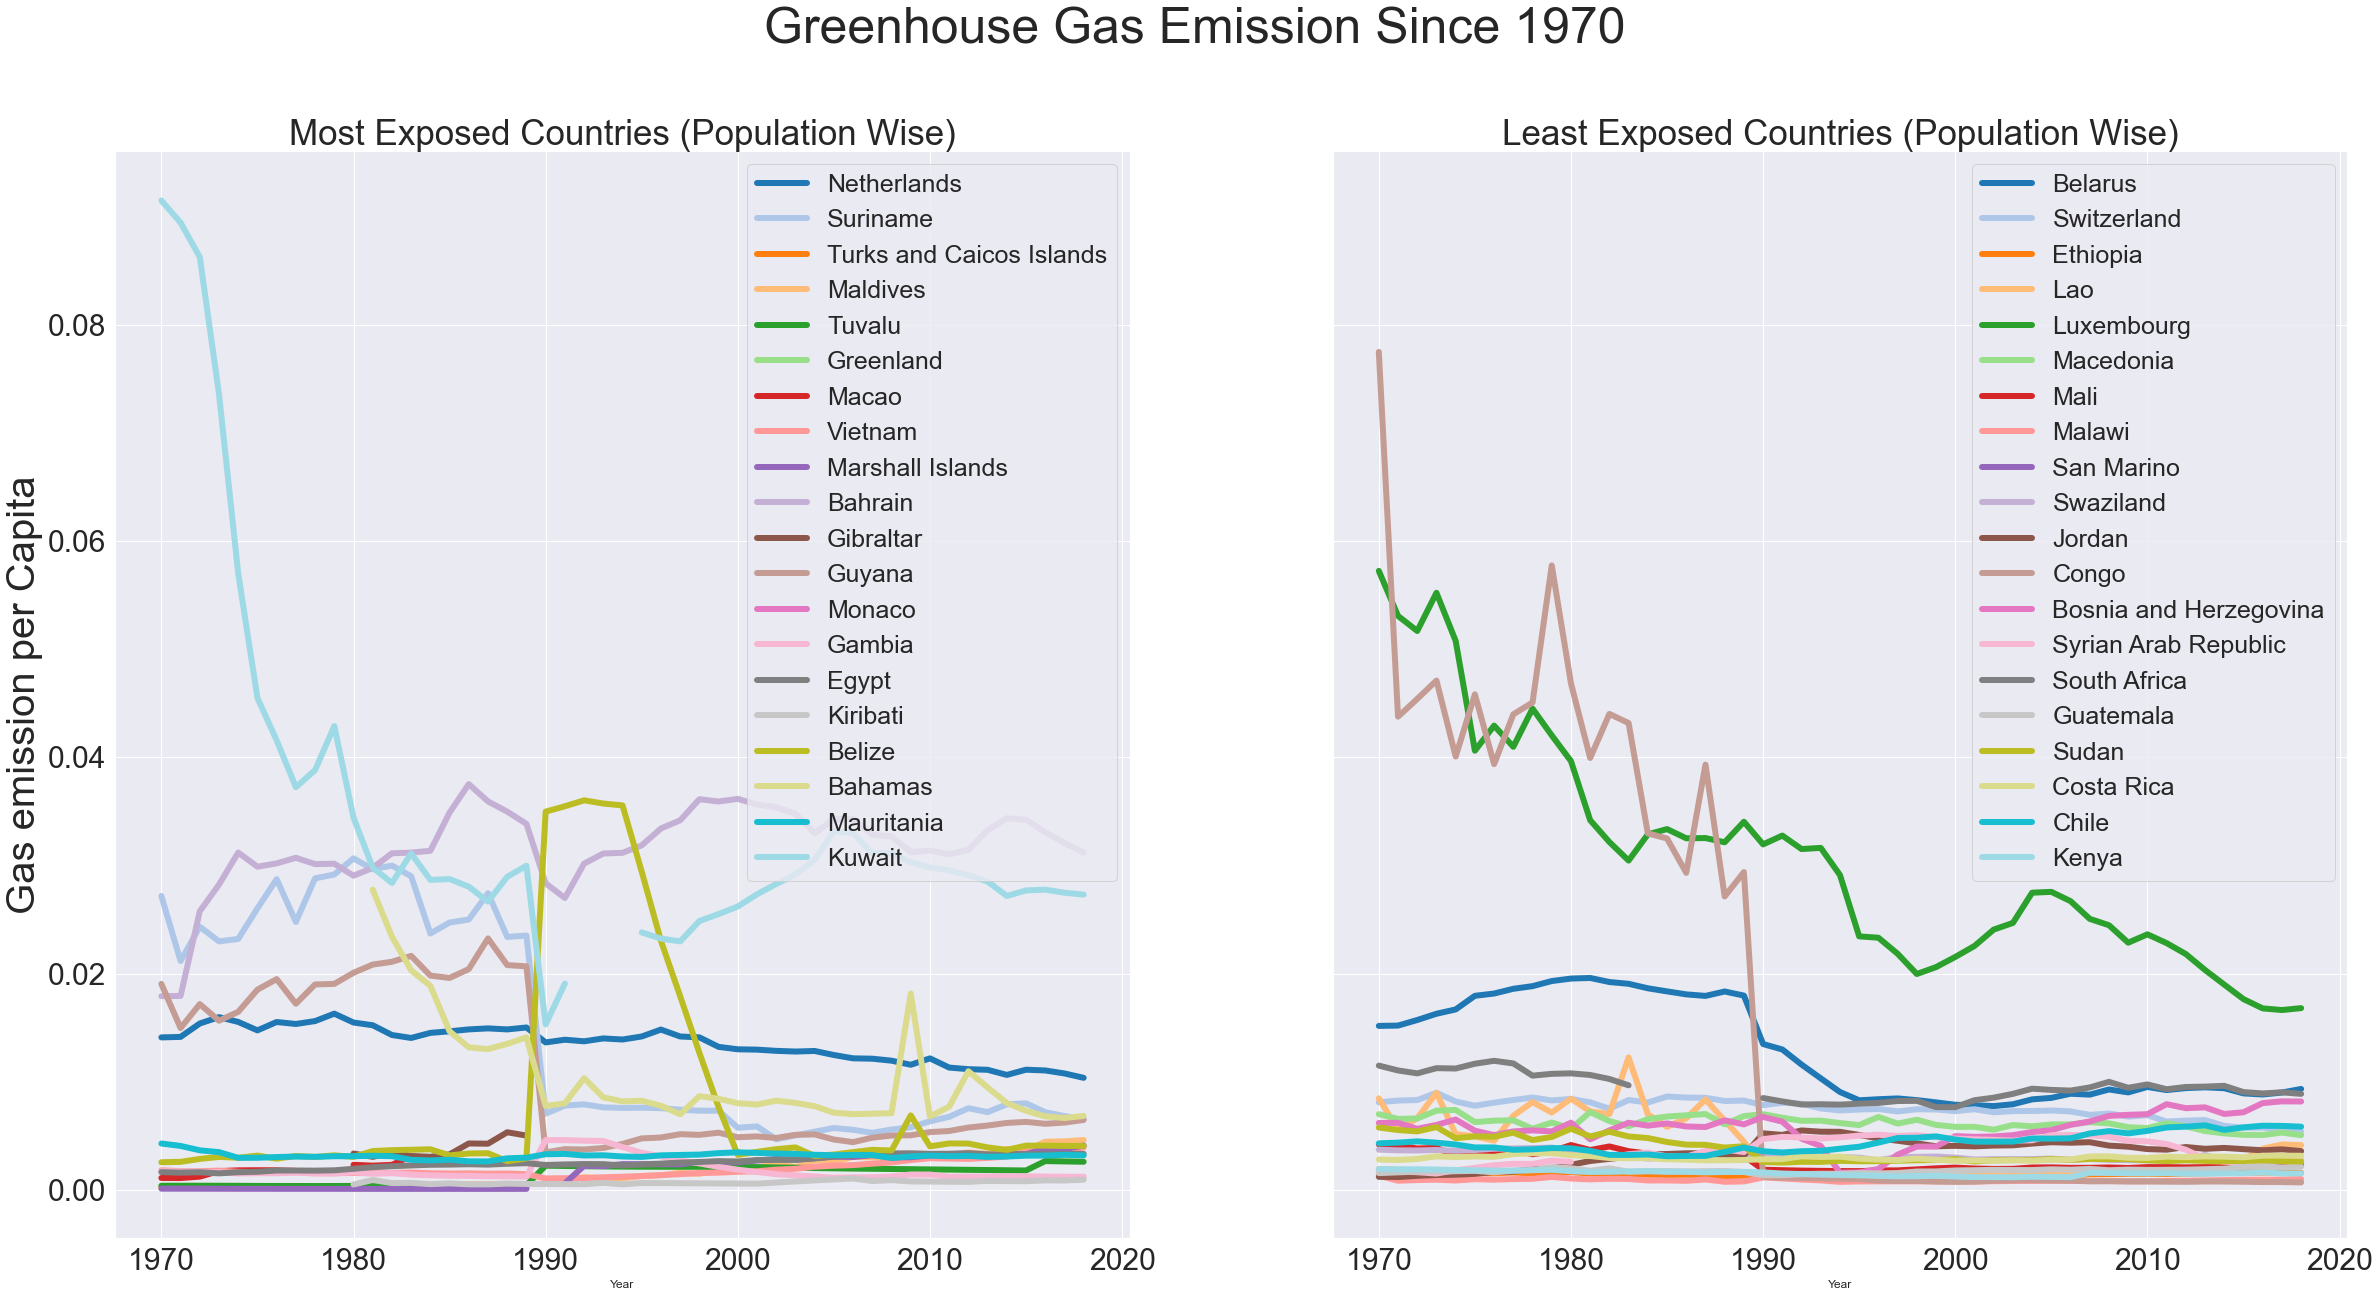

In [102]:
cm = plt.get_cmap('tab20')
figs, axs = plt.subplots(1, 2, figsize=(40, 20), sharey='all')
axs[0].set_prop_cycle('color', [cm(1.*i/20) for i in range(20)])
axs[1].set_prop_cycle('color', [cm(1.*i/20) for i in range(20)])

(gh_emission.loc[most_exposed_countries.index, years] / population.loc[most_exposed_countries.index, years]) .T.plot(linewidth=6, linestyle='-', ax=axs[0])
axs[0].set_title('Most Exposed Countries (Population Wise)', fontsize=35)
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Gas emission per Capita', fontsize=40)
axs[0].legend(most_exposed_countries_name, loc='upper right', fontsize=25)
axs[0].tick_params(axis='x', labelsize=30)
axs[0].tick_params(axis='y', labelsize=30)

(gh_emission.loc[least_exposed_countries.index, years] / population.loc[least_exposed_countries.index, years]).T.plot(linewidth=6, linestyle='-', ax=axs[1])
axs[1].set_title('Least Exposed Countries (Population Wise)', fontsize=35)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Gas emission per Capita')
axs[1].legend(least_exposed_countries_name, loc='upper right', fontsize=25)
axs[1].tick_params(axis='x', labelsize=30)
axs[1].tick_params(axis='y', labelsize=30)

figs.savefig("images/emission_highexposed_countries")

x_ = plt.suptitle('Greenhouse Gas Emission Since 1970', fontsize=50)

If we test for correlation between gas emission per capita and fraction of population exposed, we get a correlation at 0.0536 with a p-value of 0.5033. Thus we cannot reject the hypothesis that the correlation is 0. However, if we disgard the p-value then the data gives a positive correlation which means that more exposed countries emits more gas than non-exposed countries. 

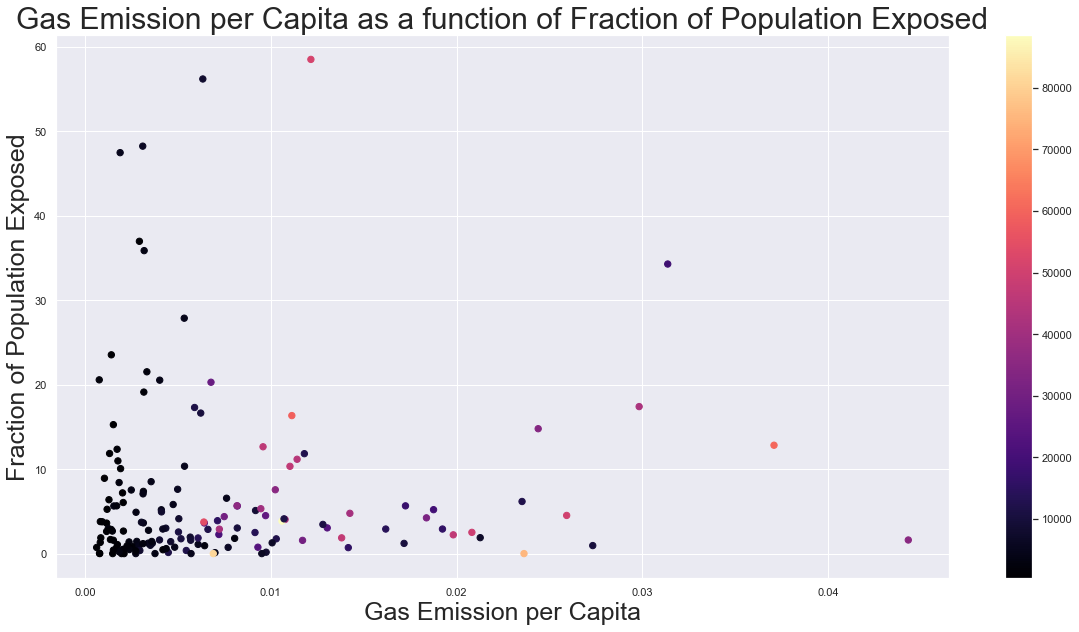

Correlation between Gas Emission per Capita per capita and Fraction of Population Exposed:: 0.0536
p-value:: 0.5033


In [103]:
iso_codes_temp = set(iso_codes).intersection(set(population_u5m.index))
correlation_test(data1=gh_emission, data2=population_u5m, color_code=gnp, color_code_per_cap=True, iso_codes=iso_codes_temp, population=population, year=2010, per_capita=[True, False], data1_name="Gas Emission per Capita", data2_name="Fraction of Population Exposed")

If we also do a correlation test between fraction of exposed land area and gas emission per capita, we get almost the same values - a higher fraction of land area exposed leads to a higher carbon footprint per capita. However, the p-value is 0.5538 which means that we cannot reject the hypothesis that the correlation is 0. 

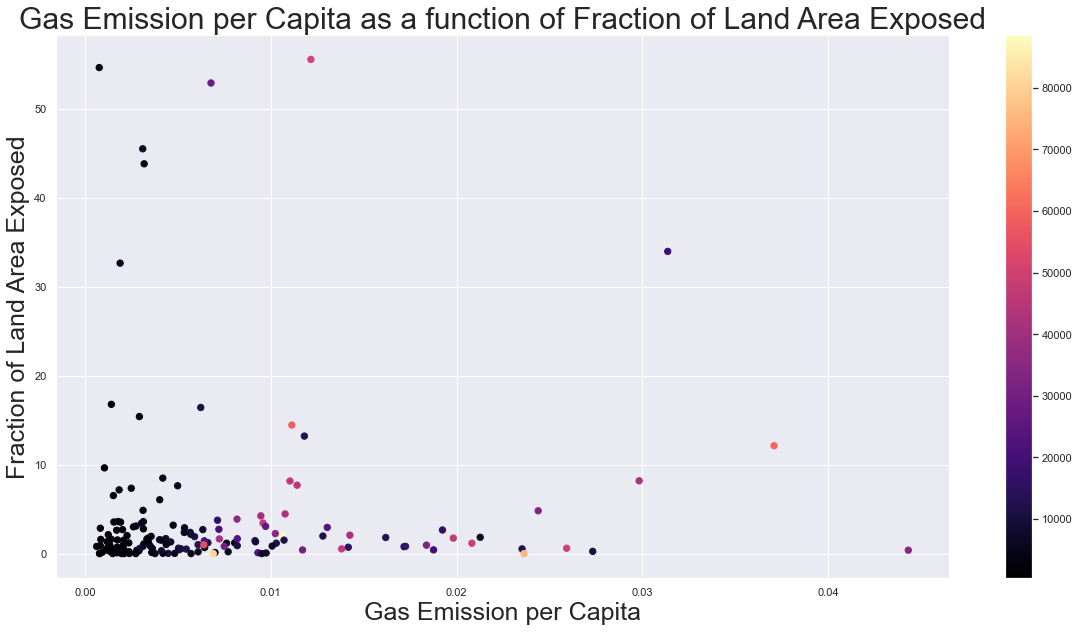

Correlation between Gas Emission per Capita per capita and Fraction of Land Area Exposed:: 0.0475
p-value:: 0.5538


In [104]:
correlation_test(data1=gh_emission, data2=landarea_u5m, color_code=gnp, color_code_per_cap=True, iso_codes=iso_codes_temp, population=population, year=2010, per_capita=[True, False], data1_name="Gas Emission per Capita", data2_name="Fraction of Land Area Exposed")

Lastly, we will check whether the most exposed countries has a higher fraction consumption from renewable energy sources of the total energy consumption than the least exposed countries. The following plot shows there is a negative correlation, i.e. more exposed countries has a lower energy consumption from renewable sources than the least exposed. The correlation is at -0.2121 with a p-value at 0.0046 which means that the correlation is significant. And the color-coding of the observations shows that it is not even the richest countries that have the highest fraction of energy coming from renewable sources. 

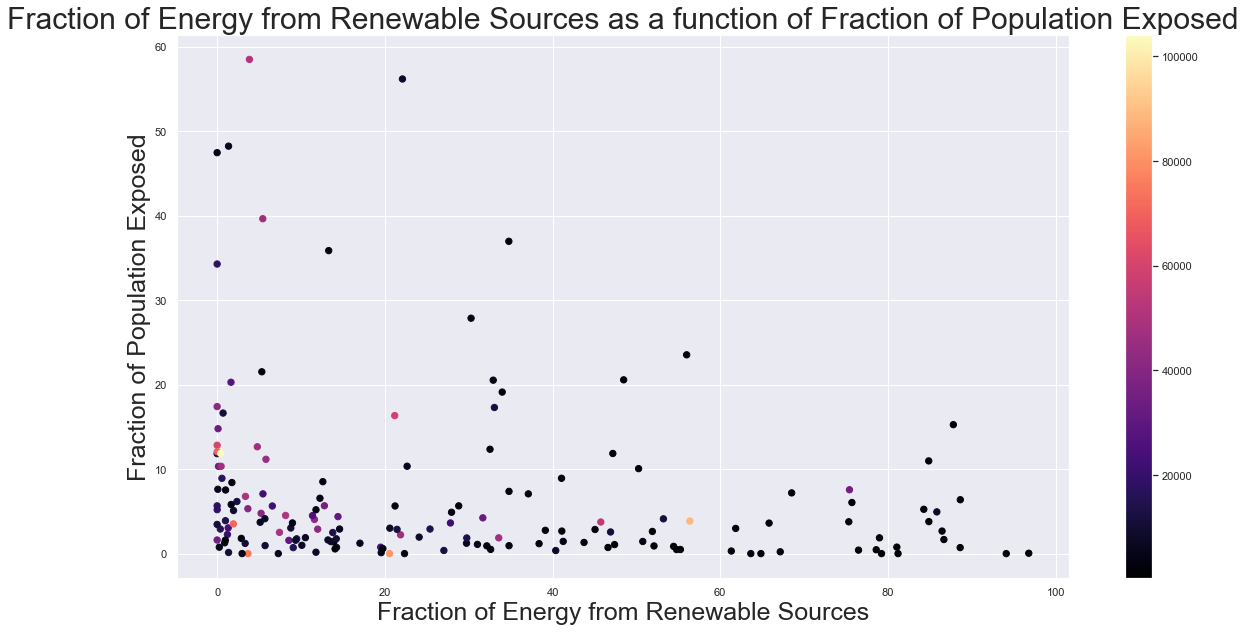

Correlation between Fraction of Energy from Renewable Sources and Fraction of Population Exposed:: -0.2121
p-value:: 0.0046


In [105]:
correlation_test(data1=renew_energy, data2=population_u5m, color_code=gnp, color_code_per_cap=True, iso_codes=iso_codes_temp, population=population, year=2010, per_capita=[False, False], data1_name="Fraction of Energy from Renewable Sources", data2_name="Fraction of Population Exposed")

## What Factors Impacts a Country's Gas Emission?

To end up our analysis, we will try to give weights to the factors *GDP per Capita, Exposed Population, Exposed Land Area* to explain the gas emission per capita for each country by fitting a linear regression to the data.

First we put all the factors into one dataframe. 

In [106]:
emiss_df = pd.concat([
    gh_emission.loc[iso_codes_temp, '2010'] / population.loc[iso_codes_temp, '2010'], 
    gnp.loc[iso_codes_temp, '2010'] / population.loc[iso_codes_temp, '2010'], 
    population_u5m.loc[iso_codes_temp, '2010'],
    landarea_u5m.loc[iso_codes_temp, '2010'],
], axis=1)

emiss_df.columns = ['gh_emission', 'gnp_per_capita', 'population_u5m', 'landarea_u5m']
emiss_df = emiss_df.dropna(how='any', axis=0)
emiss_df

gh_emission  gnp_per_capita  population_u5m  landarea_u5m
Country Code                                                           
NIC              0.002618     1461.934565        0.854528      3.007701
CPV              0.001563     3229.811227        5.636994      3.551398
TGO              0.001174      530.386455        3.610001      0.426620
MRT              0.003177     1591.201284       19.121078      1.084070
FIN              0.013820    47061.024449        1.864565      0.528236
...                   ...             ...             ...           ...
PHL              0.001715     2466.267882        5.651288      2.631697
PLW              0.012811    11231.820207        3.453916      1.973126
MDG              0.001380      464.927752        1.663528      0.748542
TUN              0.003569     4150.268690        8.515590      1.939265
DJI              0.001738     1363.935435       12.352045      0.719242

[156 rows x 4 columns]

By fitting the data, we get that the following weights for each factor. 

We see that a higher GDP and exposed population contributes to a higher carbon footprint whereas a higher exposed landarea reduces the carbon footprint. This is different from what we saw when we did the correlation testing where exposed landarea was positively correlated with a carbon footprint. 

In [107]:
X, y = emiss_df.iloc[:, 1:], emiss_df.iloc[:, 0]
lr = LinearRegression().fit(X, y)
for factor, coef in zip(X.columns, lr.coef_):
    print(f"{factor}:: {round(coef, 8)}")

gnp_per_capita:: 2.6e-07
population_u5m:: 3.482e-05
landarea_u5m:: -3.941e-05


# Genres

When doing this project, it was intended to present the results in mixing the magazine and annotated map styles. This is because it is important to guide the reader when presenting complex numbers such as GDP, exposed population to rising levels, temperature index and other data measures which may not be very intuitive measures. Thus, the text is a very important part of the presentation of the data since it may explain the parts which the reader cannot understand by just looking at the figures. However, the goal is also let the figures be self-explanatory thus that no text if needed if the reader is very familiar with the topic. But for the casual average Joe, a lot of words may be thrown in the figures which makes it neccesary to write complementary text to the figures. 

To visualize the storytelling, visual structuring and highlighting were used. It was important to create consistent figures so that the reader can intake new data with ease since the reader know how to understand the structure of the figure. This makes it faster to read off the figures which is ideal when you have complementary text that often refers to figures before drawing conclusions. Moreover, highlighting was also an imporant part of the visual narrative since it was important to tell the reader the differences between the different features which were used in this project which looks and sounds familiar. And thus it should make it easier for the reader to understand the differences in conclusions when feature distinctions are highlighted. 

To structure the narrative, this project has used of ordering, interactivety and messaging. First the ordering is important since there are a lot of data sets in this project which makes it overwhelming. Thus, when following a linear narrative, the reader will hopefully understand the reasons for adding more complexity and new data to the project. And interactivety was made available in figures where it made sense to look at the details of the figures. In the plots where interactivety was not made available was due to the unimportance of the details but rather the shape of the graphs which were important. Moreover, messaging played a huge part in the narrative structure and also the reason why I regard the project more like a magazine style than annotated map. Comments were made for each figure, labels in the figures were intended to be descriptive and a lot of repetitive statements were made to make sure that the reader catches the importance of these statements. 

# Visualizations

A few different visualization techniques were used in this project. First we have a simple line chart with colored area to show the temperature index. The line chart is a great way to visualize time series data and colored area stresses that the line has surpassed some threshold, which in this case is 0. It was therefore made easy to distuingish when there were good and bad movements (or cold and hot) of the temperature index. 

Moreover, bar plots of the survey results were made where the width of each bar is 1. And the answers were represented as a fractional part of the bar to display how the participants answered in the survey. Giving different answers a different color and each country a new bar, makes it easy for the reader to distuingish between answers and colors. However, it is still overwhelming to compare the countries with each other since the width of each answer is different for each country.

Also aggregated line charts were made. This means that each line chart were made with the line underneath as the axis. Therefore the height of e.g. the second line is equal to the value sum of the values from line 1 and 2. This is one of the plots where the absolute value of each line for each country is not so important but the aggregated line chart is, i.e. how much is the total gas emission, population, GDP in the world. These lines were also color aggreagted into the continent where the country is in so that it is possible to get a quick understanding of each region in the world. 

Horizontal bar plots (animations) were also made but is not visible in the notebook or the website. This is because the size of these animation became too large and thus it was not possible to view the notebook in NBViewer or upload it to Github. However, if you remove the comment in the cells where it says "remove to see animation", you can produce it yourself. This was a VERY important figure in the story narrative since this can make the reader view the animation and let the figure explain the data (also the reason why this project also is a annotated map). 

World maps of data values had the purpose of showing familiar objects to the reader so that the reader better can understand what the data means. If presenting data in a bar plot, the reader may have a hard time getting an intuitive sense for the presentation. However, if the reader is presented a world map, which I believe the reader is very familiar with, the presentation of the data may be more intuitive and therefore more digestible. 

Lastly, scatter plots with color coding were also made. Scatter plots in itself may be hard to understand since the reader does not have any relation to each individual observation. However, if all observations are color coded, e.g by GDP or population, the reader gets an additional dimension of information on a 2D image and therefore also views the plot in a context. 

# Discussion

A lot of stuff were happening in this project. 

The data collection went great since there were a lot of data about this topic. And also it went well with creating intuitive world maps that makes the data more digestible. The project did show some interesting insights such as more exposed countries had a higher carbon footprint than countries who were not so exposed to rising sea levels. And also that countries that have a stigma for being very pollutive such as China and India actually had a lower carbon footprint per capita than many other countries, Denmark included. 

However, this project did become a mess since too much data were included. This made the project loose focus and began searching in the dark rather than having a fixed guideline for the end destination. This way of working is however ideal since you avoid biases in the data analysis and avoid drawing conclusions which are plain wrong. But for this kind of complexity for data, much more time is neccesary to make a thorough analysis and come up with good insights rather than intuitive conclusions which most would know without looking at the data. Also the animations went wrong in this project which more is a technical issue and probably computer specific. But it was simply not possible to render animations to HTML so that these could be presented on the webpage and in this notebook without exceeding 200MB. 

# Contributions

This project was made alone by me; s174230. 